In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno 
from collections import Counter

In [2]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [4]:
#model evaluation
from sklearn.model_selection import cross_val_score


In [5]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
train = pd.read_csv(r'C:\Users\user\kaggle\titanic\kaggle_titanic\train.csv')
test = pd.read_csv(r'C:\Users\user\kaggle\titanic\kaggle_titanic\test.csv')
ss = pd.read_csv(r'C:\Users\user\kaggle\titanic\kaggle_titanic\gender_submission.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
ss.shape

(418, 2)

In [11]:
print("Tranining set shape", train.shape)
print("Test set shape", test.shape)

Tranining set shape (891, 12)
Test set shape (418, 11)


# 3. Data description
Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

* **Survived**: **0** = Did not survive, **1** = Survived
* **Pclass**: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.
* **Sex**: Male or female
* **Age**: Age in years, fractional if less than 1
* **SibSp**: Number of siblings or spouses aboard the titanic
* **Parch**: Number of parents or children aboard the titanic
* **Ticket**: Passenger ticket number
* **Fare**: Passenger fare
* **Cabin**: Cabin number
* **Embarked**: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

In [12]:
# Non-null count and data types of the training and test set
train.info()
print ('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [13]:
# Missing data in training set by columns
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [14]:
#Missing data in test set by columns
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

<AxesSubplot:>

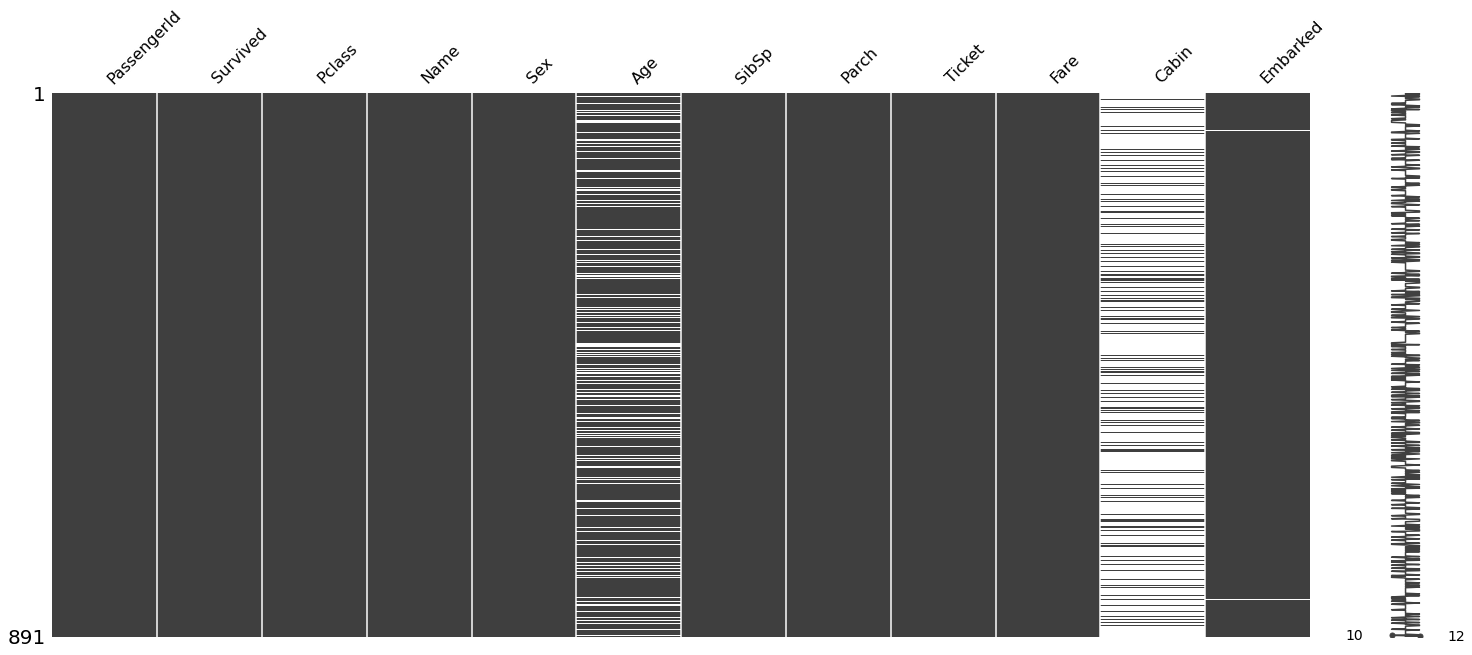

In [15]:
# Missing data in training set
missingno.matrix(train)

<AxesSubplot:>

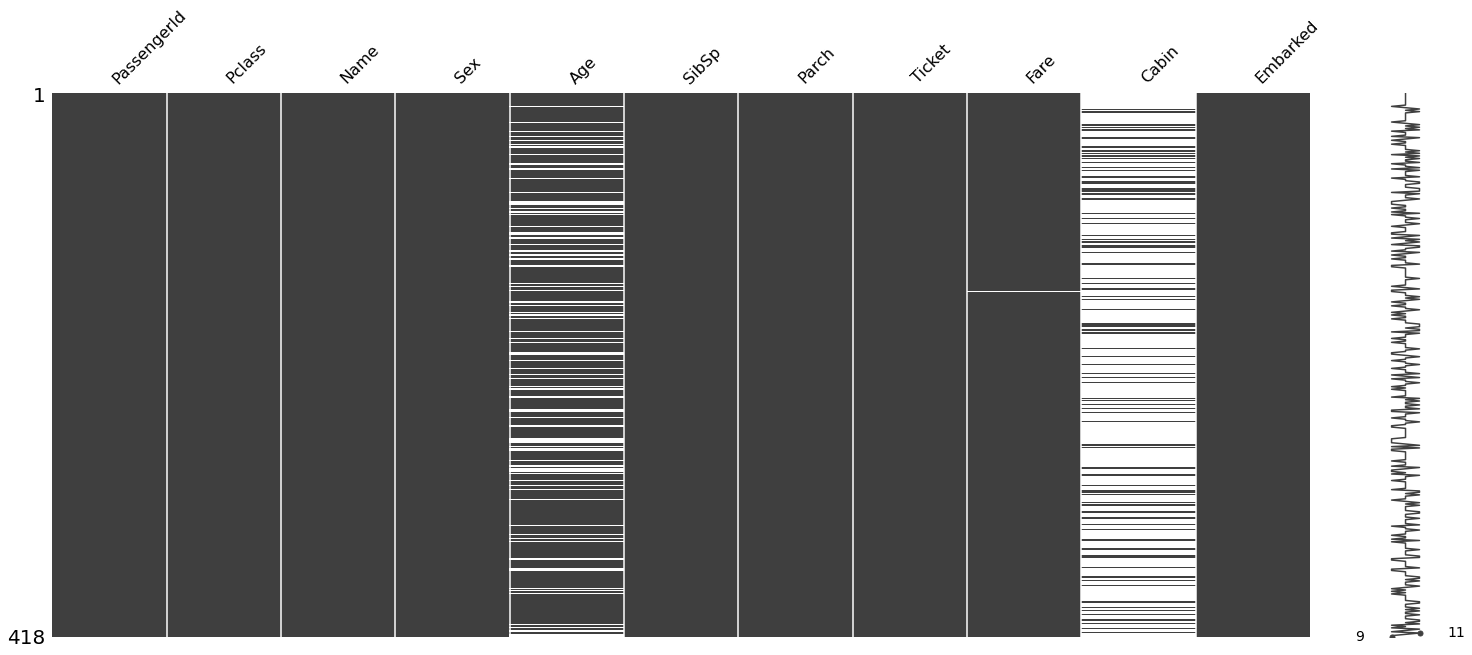

In [16]:
#Missing data in test set  
missingno.matrix(test)

In [17]:
# Summary statistics for training set
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# Summary statistics for test set
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 4.2 Feature analysis
* A dataframe is made up of rows and columns. Number of rows correspond to the number of observations in our dataset whereas columns, sometimes called features, represent characteristics that help describe these observations. In our dataset, rows are the passengers on the titanic whereas columns are the features that describe the passengers like their age, gender etc.

* Before we move on, it is also important to note the difference between a categorical variable and a numerical variable. Categorical variables, as the name suggests, have values belonging to one of two or more categories and there is usually no intrinsic ordering to these categories. An example of this in our data is the Sex feature. Every passenger is distinctly classified as either male or female. Numerical variables, on the other hand, have a continuous distribution. Some examples of numerical variables are the Age and Fare features.

* Knowing if a feature is a numerical variable or categorical variable helps us structure our analysis more properly. For instance, it doesn't make sense to calculate the average of a categorical variable such as gender simply because gender is a binary classification and therefore has no intrinsic ordering to its values.

* In this next section of the notebook, we will analyse the features in our dataset individually and see how they correlate with survival probability.

### Categorical variable: Sex

In [19]:
# Value counts of the sex coumn
train['Sex'].value_counts(dropna = False)
#There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [20]:
# Mean of survival by sex
train [['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

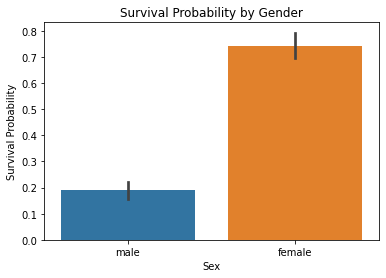

In [21]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

### Categorical Variable: Pclass

In [22]:
# Value counts of the Pclass column 
train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
# Mean of survival by passenger class
train[['Pclass','Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

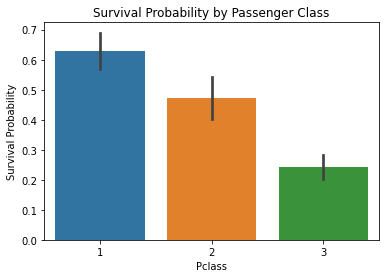

In [24]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

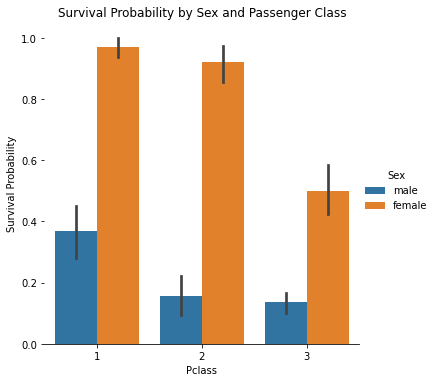

In [25]:
# Survived by gender and passenger class 
g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

### Categorical Variable: Embarked


In [26]:
# Value counts of the Embarked column
train['Embarked'].value_counts(dropna = False)
# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [27]:
# Mean of survival by point of embarkation
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

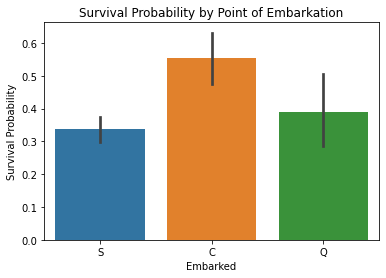

In [28]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

Survival probability is highest for location C and lowest for location S.

Is there a reason for this occurence? We can formulate a hypothesis whereby the majority of the first class passengers have embarked from location C and because they have a highest survival probability, this has resulted in location C having a highest survival probability. Alternatively, there could have been more third class passengers that embarked from location S and because they have the lowest survival probability, this has caused location S to have the lowest survival probability.

Let us now test this hypothesis.

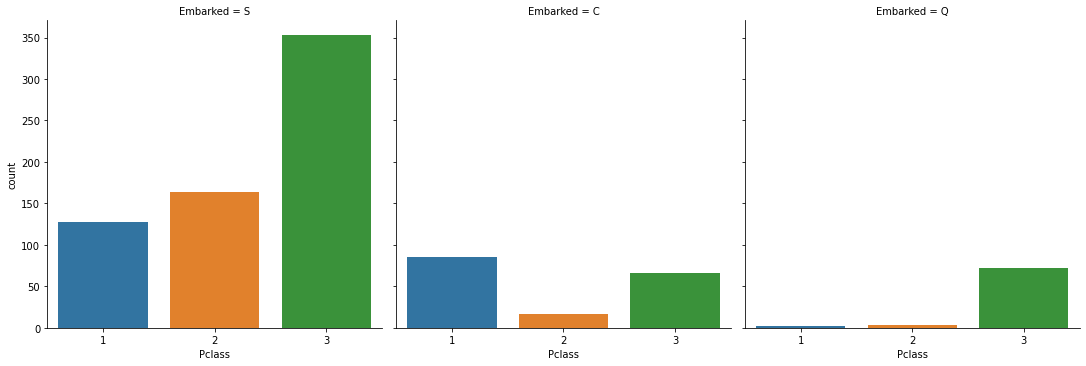

In [29]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

Our hypothesis appears to be true. Location S has the most third class passengers whereas location C has the most first class passengers.

# Numerical variables
Numerical variables in our dataset are SibSp, Parch, Age and Fare.

### Detect and remove outliers in numerical variables
Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

In [30]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [31]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [32]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<AxesSubplot:>

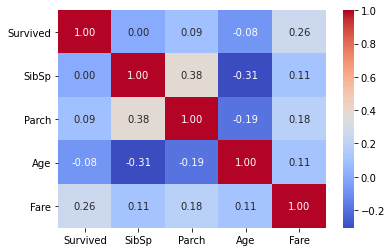

In [33]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

# Comment: Fare seems to be the only feature that has a substantial correlation with survival

# Numerical variable: SibSp

In [34]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [35]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

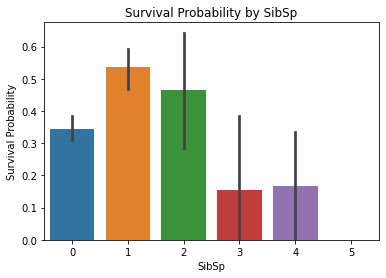

In [36]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

# Numerical variable: Parch

In [37]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

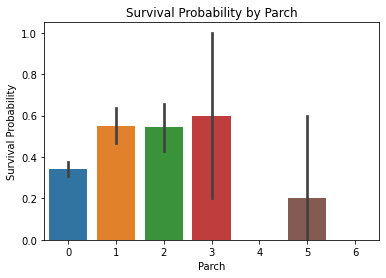

In [39]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

# Numerical variable: Age

In [40]:
# Null values in Age column 

train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Passenger Age Distribution')

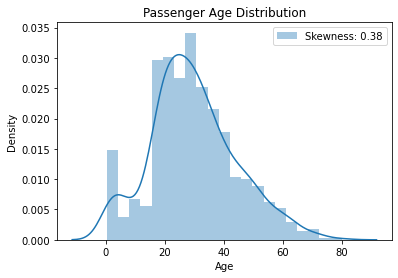

In [41]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

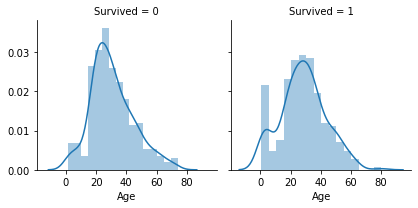

In [42]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age') 

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

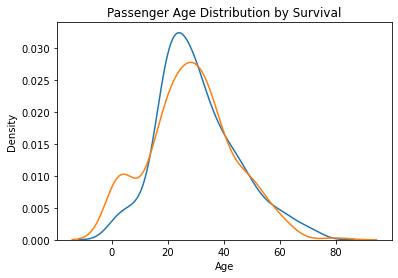

In [43]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

# Numerical variable: Fare

In [44]:
# Null values of Fare column 

train['Fare'].isnull().sum()


0

Text(0, 0.5, 'Passenger Fare Distribution')

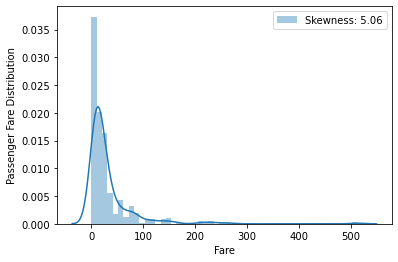

In [45]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# Data preprocessing
Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

* Drop and fill missing values
* Data trasformation (log transformation)
* Feature engineering
* Feature encoding

## 5.1 Drop and fill missing values

In [46]:
# Drop ticket and cabin features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

I have decided to drop both ticket and cabin for simplicity of this tutorial but if you have the time, I would recommend going through them and see if they can help improve your model.

In [47]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [48]:
# Compute the most frequent value of Embarked in training set

mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [49]:
# Fill missing value in Embarked with mode

train['Embarked'].fillna(mode, inplace = True)

In [50]:
# Missing values in test set

test.isnull().sum().sort_values(ascending = False)

Age            86
Fare            1
Embarked        0
Parch           0
SibSp           0
Sex             0
Name            0
Pclass          0
PassengerId     0
dtype: int64

In [51]:
# Compute median of Fare in test set 

median = test['Fare'].dropna().median()
median

14.4542

In [52]:
# Fill missing value in Fare with median

test['Fare'].fillna(median, inplace = True)

In [53]:
# Combine training set and test set

combine = pd.concat([train, test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [54]:
# Missing values in the combined dataset

combine.isnull().sum().sort_values(ascending = False)

Survived       418
Age            256
Embarked         0
Fare             0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

We can ignore missing values in the Survived column because all of them are from the test set. Now we need to fill missing values in the Age column.

The goal is to use features that are most correlated with Age to predict the values for Age. But first, we need to convert Sex into numerical values where 0 = male and 1 = female. This process is known as encoding and we will further explore this later in the notebook.

In [55]:
# Convert Sex into numerical values where 0 = male and 1 = female

combine['Sex'] = combine['Sex'].map({'male': 0, 'female': 1})

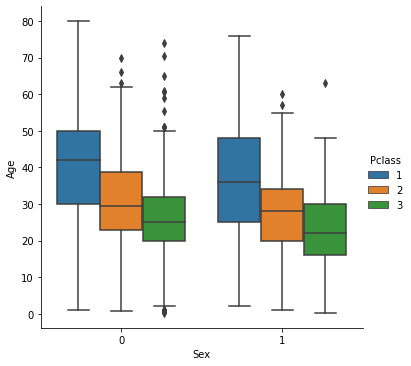

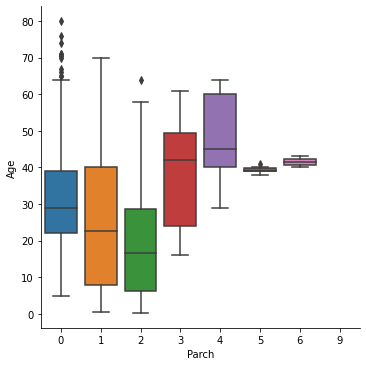

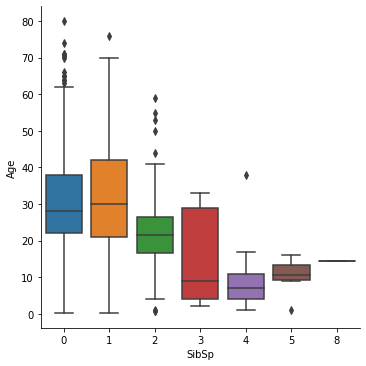

In [56]:
sns.factorplot(y = 'Age', x = 'Sex', hue = 'Pclass', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'Parch', kind = 'box', data = combine)
sns.factorplot(y = 'Age', x = 'SibSp', kind = 'box', data = combine)

<AxesSubplot:>

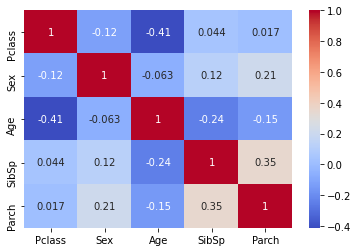

In [57]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis = 1).corr(), annot = True, cmap = 'coolwarm')


Age is not correlated with Sex but is negatively correlated with SibSp, Parch and Pclass 

In [58]:
# Check number of missing ages 

age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch and PClass values and fill the missing age with the median of those rows. If rows are not found, simply fill the missing age with the median of the entire Age column.

In [59]:
# Loop through list and impute missing ages

for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp']) 
                                 & (combine['Parch'] == combine.iloc[index]['Parch'])
                                 & (combine['Pclass'] == combine.iloc[index]["Pclass"])].median()
    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        combine['Age'].iloc[index] = predict_age

In [60]:
# Make sure there is no more missing ages 

combine['Age'].isnull().sum()

0

## 5.2 Data transformation
Recall that our passenger fare column has a very high positive skewness. Therefore, we will apply a log transformation to address this issue.

Text(0.5, 1.0, 'Passenger Fare Distribution')

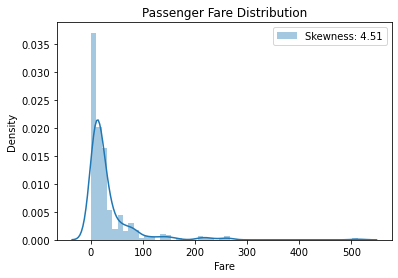

In [61]:
# Passenger fare distribution

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [62]:
# Apply log transformation to Fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

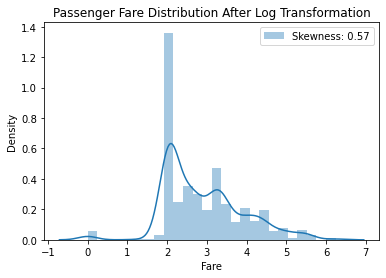

In [63]:
# Passenger fare distribution after log transformation

sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

## 5.3 Feature engineering
Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

In this section, I will construct 3 new features:

* Title
* IsAlone
* Age*Class

## 5.3.1 Title

In [64]:
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [65]:
# Get title from name

combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [66]:
# Value counts of Title

combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Jonkheer          1
Dona              1
Sir               1
the Countess      1
Capt              1
Mme               1
Don               1
Lady              1
Name: Title, dtype: int64

In [67]:

# Number of unique Title

combine['Title'].nunique()

18

In [68]:
# Simplify title

combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')

<AxesSubplot:xlabel='Title', ylabel='count'>

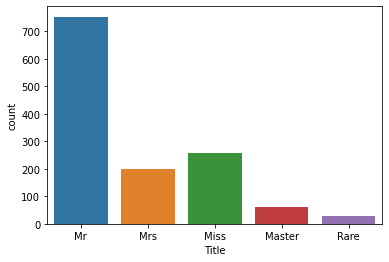

In [69]:
sns.countplot(combine['Title'])

In [70]:
# Mean of survival by name title

combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

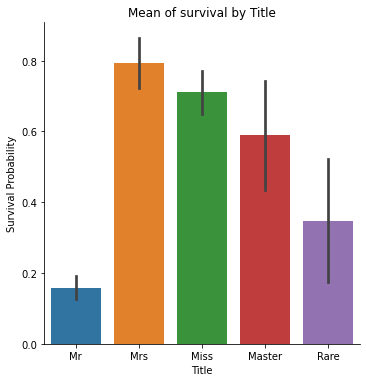

In [71]:
sns.factorplot(x = 'Title', y = 'Survived', data = combine, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [72]:
# Drop name column

combine = combine.drop('Name', axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


## 5.3.2 IsAlone

In [73]:
# Calculate family size from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [74]:
# Mean of survival by family size

combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [75]:
# Create IsAlone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

In [76]:
# Mean of survival by IsAlone

combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [77]:
# Drop SibSp, Parch and FamilySize features from combine dataframe

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


## 5.3.3 Age*Class
To create our new Age*Class feature, we need to first transform Age into an ordinal variable. Ordinal variable is much like a categorical variable but with intrisinc ordering in their values.

We will group Ages into 5 separate age bands and assign a number to each age band.

In [78]:
# Create age bands and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [79]:
# Assign ordinals to each age band 

combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [80]:
# Drop age band feature

combine = combine.drop('AgeBand', axis = 1)

In [81]:
# Age and Pclass data types 

combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [82]:
# Convert ordinal Age into integer

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int32')

In [83]:

# Create Age*Class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


## 5.4 Feature encoding
Machine learning models require all input and output variables to be numeric. Therefore, we need to encode all of our categorical data before we can fit the models to our data.

Previously, we have encoded the sex column such that 0 = male and 1 = female. We need to repeat this process for Title and Embarked. In addition, similar to the age column, I will also transform Fare into an ordinal variable rather than a continuous variable.

In [84]:
combine.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6


In [85]:
# Encode Title and Embarked feature

combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'], prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [86]:
# Divide Fare into four bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [87]:
# Assign ordinal to each fare band

combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [88]:
# Convert Fare into integer

combine['Fare'] = combine['Fare'].astype('int')

In [89]:
# Drop FareBand feature

combine = combine.drop('FareBand', axis = 1)

In [90]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [91]:
# Separate training and test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]

In [92]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [93]:
# Drop passenger ID column from and training set

train = train.drop('PassengerId', axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [94]:
# Convert survived back to integer in the training set

train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [95]:
test.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [96]:
# Drop passenger survived column from test set

test = test.drop('Survived', axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


Our dataframes are ready for modelling!

# 6. Modelling¶
Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

* Logistic regression
* Support vector machines
* K-nearest neighbours
* Gaussian naive bayes
* Perceptron
* Linear SVC
* Stochastic gradient descent
* Decision tree
* Random forest
* CatBoost

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their accuracy at making predictions. Once the best model is determined, I will also do hyperparameter tuning to further boost the performance of the best model.

## 6.1 Split training data
We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the survived column in our training set and X_train is the other columns in the training set excluding the Survived column. Our models will learn to classify survival, Y_train based on all X_train and make predictions on X_test.

In [97]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


## 6.2 Fit model to data and make predictions
This requires 3 simple steps: instantiate the model, fit the model to the training set and predict the data in test set.

## 6.2.1 Logistic regression

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.93

## 6.2.2 Support vector machines

In [99]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.09

## 6.2.3 K-nearest neighbours (KNN)

In [100]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.79

## 6.2.4 Gaussian naive bayes

In [101]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.11

## 6.2.5 Perceptron

In [102]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.57

## 6.2.6 Linear SVC

In [103]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

80.25

## 6.2.7 Stochastic gradient descent

In [104]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.23

## 6.2.8 Decision tree

In [105]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

## 6.2.9 Random forest

In [106]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

## 6.2.10 CatBoost

In [107]:
catboost = CatBoostClassifier()
catboost.fit(X_train, Y_train)
Y_pred = catboost.predict(X_test)
acc_catboost = round(catboost.score(X_train, Y_train) * 100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 60.4ms	remaining: 1m
1:	learn: 0.6798485	total: 61.6ms	remaining: 30.7s
2:	learn: 0.6729520	total: 62.8ms	remaining: 20.9s
3:	learn: 0.6669729	total: 63.8ms	remaining: 15.9s
4:	learn: 0.6607853	total: 64.8ms	remaining: 12.9s
5:	learn: 0.6554568	total: 65.9ms	remaining: 10.9s
6:	learn: 0.6500727	total: 67.3ms	remaining: 9.55s
7:	learn: 0.6437982	total: 68.5ms	remaining: 8.5s
8:	learn: 0.6398272	total: 69.4ms	remaining: 7.64s
9:	learn: 0.6351628	total: 70.7ms	remaining: 7s
10:	learn: 0.6305969	total: 71.7ms	remaining: 6.44s
11:	learn: 0.6252274	total: 72.9ms	remaining: 6s
12:	learn: 0.6203165	total: 74.1ms	remaining: 5.63s
13:	learn: 0.6163249	total: 75.1ms	remaining: 5.29s
14:	learn: 0.6126752	total: 75.8ms	remaining: 4.97s
15:	learn: 0.6078515	total: 77ms	remaining: 4.74s
16:	learn: 0.6033553	total: 78.3ms	remaining: 4.53s
17:	learn: 0.5984437	total: 79.5ms	remaining: 4.33s
18:	learn: 0.5935188	total: 80.7ms	remaining: 4.17s
19:	l

246:	learn: 0.3746553	total: 292ms	remaining: 890ms
247:	learn: 0.3745128	total: 293ms	remaining: 888ms
248:	learn: 0.3742828	total: 294ms	remaining: 887ms
249:	learn: 0.3742219	total: 295ms	remaining: 884ms
250:	learn: 0.3740154	total: 296ms	remaining: 882ms
251:	learn: 0.3739638	total: 297ms	remaining: 880ms
252:	learn: 0.3737938	total: 297ms	remaining: 878ms
253:	learn: 0.3736145	total: 298ms	remaining: 876ms
254:	learn: 0.3735231	total: 299ms	remaining: 875ms
255:	learn: 0.3733572	total: 300ms	remaining: 873ms
256:	learn: 0.3732943	total: 302ms	remaining: 872ms
257:	learn: 0.3731614	total: 303ms	remaining: 870ms
258:	learn: 0.3729762	total: 304ms	remaining: 868ms
259:	learn: 0.3728249	total: 305ms	remaining: 867ms
260:	learn: 0.3727106	total: 305ms	remaining: 865ms
261:	learn: 0.3725067	total: 306ms	remaining: 863ms
262:	learn: 0.3723114	total: 307ms	remaining: 861ms
263:	learn: 0.3722418	total: 308ms	remaining: 859ms
264:	learn: 0.3720229	total: 309ms	remaining: 857ms
265:	learn: 

560:	learn: 0.3499348	total: 580ms	remaining: 454ms
561:	learn: 0.3499182	total: 581ms	remaining: 453ms
562:	learn: 0.3499014	total: 582ms	remaining: 452ms
563:	learn: 0.3498341	total: 583ms	remaining: 450ms
564:	learn: 0.3497704	total: 584ms	remaining: 449ms
565:	learn: 0.3497683	total: 584ms	remaining: 448ms
566:	learn: 0.3497535	total: 585ms	remaining: 447ms
567:	learn: 0.3496656	total: 586ms	remaining: 446ms
568:	learn: 0.3496473	total: 587ms	remaining: 444ms
569:	learn: 0.3496353	total: 587ms	remaining: 443ms
570:	learn: 0.3495768	total: 588ms	remaining: 442ms
571:	learn: 0.3495608	total: 589ms	remaining: 441ms
572:	learn: 0.3494940	total: 590ms	remaining: 440ms
573:	learn: 0.3494887	total: 591ms	remaining: 439ms
574:	learn: 0.3494097	total: 592ms	remaining: 438ms
575:	learn: 0.3493427	total: 593ms	remaining: 436ms
576:	learn: 0.3493226	total: 594ms	remaining: 435ms
577:	learn: 0.3492725	total: 595ms	remaining: 434ms
578:	learn: 0.3492197	total: 596ms	remaining: 433ms
579:	learn: 

730:	learn: 0.3428342	total: 726ms	remaining: 267ms
731:	learn: 0.3427797	total: 727ms	remaining: 266ms
732:	learn: 0.3427160	total: 728ms	remaining: 265ms
733:	learn: 0.3427071	total: 729ms	remaining: 264ms
734:	learn: 0.3426534	total: 730ms	remaining: 263ms
735:	learn: 0.3426093	total: 731ms	remaining: 262ms
736:	learn: 0.3425308	total: 732ms	remaining: 261ms
737:	learn: 0.3425163	total: 732ms	remaining: 260ms
738:	learn: 0.3424834	total: 733ms	remaining: 259ms
739:	learn: 0.3424400	total: 734ms	remaining: 258ms
740:	learn: 0.3423784	total: 735ms	remaining: 257ms
741:	learn: 0.3423617	total: 736ms	remaining: 256ms
742:	learn: 0.3423226	total: 737ms	remaining: 255ms
743:	learn: 0.3422624	total: 738ms	remaining: 254ms
744:	learn: 0.3422389	total: 739ms	remaining: 253ms
745:	learn: 0.3421964	total: 739ms	remaining: 252ms
746:	learn: 0.3421823	total: 740ms	remaining: 251ms
747:	learn: 0.3421188	total: 741ms	remaining: 250ms
748:	learn: 0.3420506	total: 742ms	remaining: 249ms
749:	learn: 

891:	learn: 0.3363794	total: 872ms	remaining: 106ms
892:	learn: 0.3363534	total: 874ms	remaining: 105ms
893:	learn: 0.3363295	total: 875ms	remaining: 104ms
894:	learn: 0.3362840	total: 876ms	remaining: 103ms
895:	learn: 0.3362485	total: 877ms	remaining: 102ms
896:	learn: 0.3362115	total: 878ms	remaining: 101ms
897:	learn: 0.3361695	total: 879ms	remaining: 99.8ms
898:	learn: 0.3361286	total: 880ms	remaining: 98.8ms
899:	learn: 0.3360950	total: 880ms	remaining: 97.8ms
900:	learn: 0.3360615	total: 881ms	remaining: 96.8ms
901:	learn: 0.3360216	total: 882ms	remaining: 95.8ms
902:	learn: 0.3359619	total: 883ms	remaining: 94.9ms
903:	learn: 0.3359140	total: 884ms	remaining: 93.9ms
904:	learn: 0.3358963	total: 885ms	remaining: 92.9ms
905:	learn: 0.3358740	total: 886ms	remaining: 91.9ms
906:	learn: 0.3358385	total: 887ms	remaining: 90.9ms
907:	learn: 0.3358056	total: 888ms	remaining: 89.9ms
908:	learn: 0.3357573	total: 889ms	remaining: 89ms
909:	learn: 0.3357190	total: 889ms	remaining: 88ms
910

In [109]:
acc_catboost

85.7

## 6.3 Model evaluation and hyperparameter tuning
Once all our models have been trained, the next step is to assess the performance of these models and select the one which has the highest prediction accuracy.

## 6.3.1 Training accuracy
Training accuracy shows how well our model has learned from the training set.

In [110]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
                                 'Linear SVC', 'Decision Tree', 'CatBoost'],
                       'Score': [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron,
                                 acc_sgd, acc_linear_svc, acc_decision_tree, acc_catboost]})

models.sort_values(by = 'Score', ascending = False, ignore_index = True)

,Model,Score
0,Random Forest,85.70
1,Decision Tree,85.70
2,CatBoost,85.70
3,KNN,84.79
4,Support Vector Machines,83.09
5,Logistic Regression,80.93
6,Linear SVC,80.25
7,Perceptron,79.57
8,Stochastic Gradient Decent,79.23
9,Naive Bayes,79.11


## 6.3.2 K-fold cross validation
It is important to not get too carried away with models with impressive training accuracy as what we should focus on instead is the model's ability to predict out-of-samples data, in other words, data our model has not seen before.

This is where k-fold cross validation comes in. K-fold cross validation is a technique whereby a subset of our training set is kept aside and will act as holdout set for testing purposes. Here is a great video explaining the concept in more detail.

In [111]:

# Create a list which contains classifiers 

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

10

In [112]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, Y_train, scoring = 'accuracy', cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 1ms	remaining: 1s
1:	learn: 0.6803102	total: 1.97ms	remaining: 981ms
2:	learn: 0.6743326	total: 2.89ms	remaining: 962ms
3:	learn: 0.6684760	total: 3.78ms	remaining: 941ms
4:	learn: 0.6624557	total: 4.62ms	remaining: 920ms
5:	learn: 0.6573314	total: 5.45ms	remaining: 903ms
6:	learn: 0.6520748	total: 6.34ms	remaining: 900ms
7:	learn: 0.6460856	total: 7.23ms	remaining: 897ms
8:	learn: 0.6422711	total: 7.91ms	remaining: 871ms
9:	learn: 0.6376840	total: 8.75ms	remaining: 866ms
10:	learn: 0.6326541	total: 9.69ms	remaining: 871ms
11:	learn: 0.6272334	total: 10.7ms	remaining: 880ms
12:	learn: 0.6224744	total: 11.7ms	remaining: 887ms
13:	learn: 0.6175199	total: 12.9ms	remaining: 907ms
14:	learn: 0.6124417	total: 13.9ms	remaining: 911ms
15:	learn: 0.6097890	total: 14.4ms	remaining: 887ms
16:	learn: 0.6050558	total: 15.3ms	remaining: 885ms
17:	learn: 0.6004952	total: 16.3ms	remaining: 888ms
18:	learn: 0.5958639	total: 17.2ms	remaining: 886m

167:	learn: 0.3903673	total: 142ms	remaining: 703ms
168:	learn: 0.3898661	total: 143ms	remaining: 703ms
169:	learn: 0.3894235	total: 144ms	remaining: 703ms
170:	learn: 0.3891329	total: 145ms	remaining: 702ms
171:	learn: 0.3888871	total: 146ms	remaining: 701ms
172:	learn: 0.3883141	total: 146ms	remaining: 700ms
173:	learn: 0.3877545	total: 147ms	remaining: 700ms
174:	learn: 0.3877043	total: 148ms	remaining: 697ms
175:	learn: 0.3872753	total: 149ms	remaining: 696ms
176:	learn: 0.3869728	total: 150ms	remaining: 696ms
177:	learn: 0.3865807	total: 151ms	remaining: 695ms
178:	learn: 0.3863848	total: 151ms	remaining: 693ms
179:	learn: 0.3861438	total: 152ms	remaining: 692ms
180:	learn: 0.3859608	total: 153ms	remaining: 691ms
181:	learn: 0.3857118	total: 154ms	remaining: 691ms
182:	learn: 0.3854771	total: 154ms	remaining: 690ms
183:	learn: 0.3851276	total: 155ms	remaining: 689ms
184:	learn: 0.3847248	total: 156ms	remaining: 688ms
185:	learn: 0.3845056	total: 157ms	remaining: 687ms
186:	learn: 

348:	learn: 0.3590166	total: 292ms	remaining: 545ms
349:	learn: 0.3589592	total: 293ms	remaining: 544ms
350:	learn: 0.3587920	total: 294ms	remaining: 543ms
351:	learn: 0.3587209	total: 295ms	remaining: 543ms
352:	learn: 0.3586699	total: 296ms	remaining: 542ms
353:	learn: 0.3586015	total: 297ms	remaining: 541ms
354:	learn: 0.3584451	total: 298ms	remaining: 541ms
355:	learn: 0.3583326	total: 299ms	remaining: 540ms
356:	learn: 0.3582424	total: 299ms	remaining: 539ms
357:	learn: 0.3581233	total: 300ms	remaining: 538ms
358:	learn: 0.3580209	total: 301ms	remaining: 538ms
359:	learn: 0.3579075	total: 302ms	remaining: 537ms
360:	learn: 0.3577371	total: 303ms	remaining: 536ms
361:	learn: 0.3575759	total: 304ms	remaining: 535ms
362:	learn: 0.3574100	total: 305ms	remaining: 535ms
363:	learn: 0.3573566	total: 306ms	remaining: 534ms
364:	learn: 0.3573334	total: 306ms	remaining: 533ms
365:	learn: 0.3572311	total: 307ms	remaining: 532ms
366:	learn: 0.3571199	total: 308ms	remaining: 531ms
367:	learn: 

521:	learn: 0.3456475	total: 441ms	remaining: 404ms
522:	learn: 0.3456431	total: 442ms	remaining: 403ms
523:	learn: 0.3456154	total: 443ms	remaining: 403ms
524:	learn: 0.3455314	total: 444ms	remaining: 402ms
525:	learn: 0.3454580	total: 445ms	remaining: 401ms
526:	learn: 0.3453969	total: 446ms	remaining: 400ms
527:	learn: 0.3453134	total: 447ms	remaining: 399ms
528:	learn: 0.3452830	total: 447ms	remaining: 398ms
529:	learn: 0.3452504	total: 448ms	remaining: 397ms
530:	learn: 0.3452064	total: 449ms	remaining: 397ms
531:	learn: 0.3451021	total: 450ms	remaining: 396ms
532:	learn: 0.3449950	total: 451ms	remaining: 395ms
533:	learn: 0.3449614	total: 452ms	remaining: 394ms
534:	learn: 0.3448912	total: 453ms	remaining: 393ms
535:	learn: 0.3448556	total: 453ms	remaining: 392ms
536:	learn: 0.3448167	total: 454ms	remaining: 392ms
537:	learn: 0.3447845	total: 455ms	remaining: 391ms
538:	learn: 0.3447082	total: 456ms	remaining: 390ms
539:	learn: 0.3446548	total: 457ms	remaining: 389ms
540:	learn: 

688:	learn: 0.3375846	total: 592ms	remaining: 267ms
689:	learn: 0.3375454	total: 593ms	remaining: 267ms
690:	learn: 0.3374674	total: 594ms	remaining: 266ms
691:	learn: 0.3374004	total: 595ms	remaining: 265ms
692:	learn: 0.3373658	total: 596ms	remaining: 264ms
693:	learn: 0.3373037	total: 597ms	remaining: 263ms
694:	learn: 0.3372218	total: 598ms	remaining: 262ms
695:	learn: 0.3371925	total: 599ms	remaining: 262ms
696:	learn: 0.3371569	total: 600ms	remaining: 261ms
697:	learn: 0.3371124	total: 601ms	remaining: 260ms
698:	learn: 0.3370820	total: 601ms	remaining: 259ms
699:	learn: 0.3370263	total: 602ms	remaining: 258ms
700:	learn: 0.3369403	total: 603ms	remaining: 257ms
701:	learn: 0.3368718	total: 604ms	remaining: 256ms
702:	learn: 0.3368461	total: 605ms	remaining: 256ms
703:	learn: 0.3368126	total: 606ms	remaining: 255ms
704:	learn: 0.3367224	total: 607ms	remaining: 254ms
705:	learn: 0.3367076	total: 608ms	remaining: 253ms
706:	learn: 0.3366382	total: 609ms	remaining: 252ms
707:	learn: 

868:	learn: 0.3292058	total: 743ms	remaining: 112ms
869:	learn: 0.3291594	total: 744ms	remaining: 111ms
870:	learn: 0.3291166	total: 745ms	remaining: 110ms
871:	learn: 0.3290947	total: 746ms	remaining: 109ms
872:	learn: 0.3290597	total: 746ms	remaining: 109ms
873:	learn: 0.3290154	total: 747ms	remaining: 108ms
874:	learn: 0.3289738	total: 748ms	remaining: 107ms
875:	learn: 0.3289137	total: 749ms	remaining: 106ms
876:	learn: 0.3288576	total: 750ms	remaining: 105ms
877:	learn: 0.3288232	total: 751ms	remaining: 104ms
878:	learn: 0.3287876	total: 752ms	remaining: 103ms
879:	learn: 0.3287520	total: 753ms	remaining: 103ms
880:	learn: 0.3286874	total: 753ms	remaining: 102ms
881:	learn: 0.3286455	total: 754ms	remaining: 101ms
882:	learn: 0.3286115	total: 755ms	remaining: 100ms
883:	learn: 0.3285778	total: 756ms	remaining: 99.2ms
884:	learn: 0.3285272	total: 757ms	remaining: 98.3ms
885:	learn: 0.3284878	total: 758ms	remaining: 97.5ms
886:	learn: 0.3284218	total: 759ms	remaining: 96.7ms
887:	lea

194:	learn: 0.3882669	total: 157ms	remaining: 649ms
195:	learn: 0.3879758	total: 158ms	remaining: 649ms
196:	learn: 0.3877885	total: 159ms	remaining: 649ms
197:	learn: 0.3876820	total: 160ms	remaining: 648ms
198:	learn: 0.3873929	total: 161ms	remaining: 647ms
199:	learn: 0.3870552	total: 162ms	remaining: 647ms
200:	learn: 0.3867630	total: 162ms	remaining: 646ms
201:	learn: 0.3866814	total: 163ms	remaining: 645ms
202:	learn: 0.3866520	total: 164ms	remaining: 642ms
203:	learn: 0.3862759	total: 164ms	remaining: 641ms
204:	learn: 0.3861792	total: 165ms	remaining: 640ms
205:	learn: 0.3860253	total: 166ms	remaining: 640ms
206:	learn: 0.3856560	total: 167ms	remaining: 639ms
207:	learn: 0.3853238	total: 168ms	remaining: 638ms
208:	learn: 0.3850454	total: 168ms	remaining: 638ms
209:	learn: 0.3848439	total: 169ms	remaining: 638ms
210:	learn: 0.3845097	total: 170ms	remaining: 637ms
211:	learn: 0.3844451	total: 171ms	remaining: 636ms
212:	learn: 0.3842448	total: 172ms	remaining: 635ms
213:	learn: 

382:	learn: 0.3618725	total: 309ms	remaining: 497ms
383:	learn: 0.3617909	total: 310ms	remaining: 497ms
384:	learn: 0.3616955	total: 310ms	remaining: 496ms
385:	learn: 0.3616274	total: 311ms	remaining: 495ms
386:	learn: 0.3616064	total: 312ms	remaining: 494ms
387:	learn: 0.3615088	total: 313ms	remaining: 493ms
388:	learn: 0.3613877	total: 314ms	remaining: 493ms
389:	learn: 0.3613144	total: 315ms	remaining: 492ms
390:	learn: 0.3613082	total: 315ms	remaining: 491ms
391:	learn: 0.3612567	total: 316ms	remaining: 490ms
392:	learn: 0.3612540	total: 316ms	remaining: 489ms
393:	learn: 0.3611608	total: 317ms	remaining: 488ms
394:	learn: 0.3610541	total: 318ms	remaining: 487ms
395:	learn: 0.3609761	total: 319ms	remaining: 486ms
396:	learn: 0.3608966	total: 320ms	remaining: 486ms
397:	learn: 0.3607316	total: 320ms	remaining: 485ms
398:	learn: 0.3606436	total: 321ms	remaining: 484ms
399:	learn: 0.3606137	total: 322ms	remaining: 483ms
400:	learn: 0.3604899	total: 323ms	remaining: 482ms
401:	learn: 

575:	learn: 0.3492719	total: 463ms	remaining: 341ms
576:	learn: 0.3491894	total: 464ms	remaining: 340ms
577:	learn: 0.3491474	total: 464ms	remaining: 339ms
578:	learn: 0.3490710	total: 465ms	remaining: 338ms
579:	learn: 0.3490246	total: 466ms	remaining: 338ms
580:	learn: 0.3489773	total: 467ms	remaining: 337ms
581:	learn: 0.3489436	total: 468ms	remaining: 336ms
582:	learn: 0.3488698	total: 468ms	remaining: 335ms
583:	learn: 0.3488083	total: 469ms	remaining: 334ms
584:	learn: 0.3487533	total: 470ms	remaining: 333ms
585:	learn: 0.3487425	total: 471ms	remaining: 333ms
586:	learn: 0.3487083	total: 472ms	remaining: 332ms
587:	learn: 0.3487058	total: 472ms	remaining: 331ms
588:	learn: 0.3487047	total: 473ms	remaining: 330ms
589:	learn: 0.3486756	total: 473ms	remaining: 329ms
590:	learn: 0.3486055	total: 474ms	remaining: 328ms
591:	learn: 0.3485542	total: 475ms	remaining: 327ms
592:	learn: 0.3484952	total: 476ms	remaining: 327ms
593:	learn: 0.3484400	total: 477ms	remaining: 326ms
594:	learn: 

766:	learn: 0.3400874	total: 616ms	remaining: 187ms
767:	learn: 0.3400148	total: 618ms	remaining: 187ms
768:	learn: 0.3399444	total: 619ms	remaining: 186ms
769:	learn: 0.3399001	total: 619ms	remaining: 185ms
770:	learn: 0.3398794	total: 620ms	remaining: 184ms
771:	learn: 0.3398443	total: 621ms	remaining: 183ms
772:	learn: 0.3398131	total: 622ms	remaining: 183ms
773:	learn: 0.3397778	total: 623ms	remaining: 182ms
774:	learn: 0.3397036	total: 624ms	remaining: 181ms
775:	learn: 0.3396213	total: 624ms	remaining: 180ms
776:	learn: 0.3396129	total: 625ms	remaining: 179ms
777:	learn: 0.3395628	total: 626ms	remaining: 179ms
778:	learn: 0.3395204	total: 627ms	remaining: 178ms
779:	learn: 0.3394677	total: 628ms	remaining: 177ms
780:	learn: 0.3394347	total: 629ms	remaining: 176ms
781:	learn: 0.3394273	total: 629ms	remaining: 175ms
782:	learn: 0.3393632	total: 630ms	remaining: 175ms
783:	learn: 0.3392779	total: 631ms	remaining: 174ms
784:	learn: 0.3392285	total: 632ms	remaining: 173ms
785:	learn: 

952:	learn: 0.3326612	total: 770ms	remaining: 38ms
953:	learn: 0.3326412	total: 771ms	remaining: 37.2ms
954:	learn: 0.3326212	total: 772ms	remaining: 36.4ms
955:	learn: 0.3325619	total: 773ms	remaining: 35.6ms
956:	learn: 0.3325315	total: 774ms	remaining: 34.8ms
957:	learn: 0.3324845	total: 775ms	remaining: 34ms
958:	learn: 0.3324629	total: 775ms	remaining: 33.2ms
959:	learn: 0.3324319	total: 776ms	remaining: 32.3ms
960:	learn: 0.3323987	total: 777ms	remaining: 31.5ms
961:	learn: 0.3323659	total: 778ms	remaining: 30.7ms
962:	learn: 0.3323452	total: 779ms	remaining: 29.9ms
963:	learn: 0.3323166	total: 780ms	remaining: 29.1ms
964:	learn: 0.3322813	total: 780ms	remaining: 28.3ms
965:	learn: 0.3322519	total: 781ms	remaining: 27.5ms
966:	learn: 0.3322227	total: 782ms	remaining: 26.7ms
967:	learn: 0.3321816	total: 783ms	remaining: 25.9ms
968:	learn: 0.3321540	total: 784ms	remaining: 25.1ms
969:	learn: 0.3321303	total: 784ms	remaining: 24.3ms
970:	learn: 0.3320783	total: 785ms	remaining: 23.5

294:	learn: 0.3492568	total: 238ms	remaining: 568ms
295:	learn: 0.3491023	total: 238ms	remaining: 567ms
296:	learn: 0.3489380	total: 239ms	remaining: 567ms
297:	learn: 0.3487970	total: 240ms	remaining: 566ms
298:	learn: 0.3486484	total: 241ms	remaining: 565ms
299:	learn: 0.3484547	total: 242ms	remaining: 564ms
300:	learn: 0.3483469	total: 243ms	remaining: 564ms
301:	learn: 0.3482942	total: 243ms	remaining: 563ms
302:	learn: 0.3481555	total: 244ms	remaining: 562ms
303:	learn: 0.3480384	total: 245ms	remaining: 561ms
304:	learn: 0.3479585	total: 246ms	remaining: 560ms
305:	learn: 0.3477341	total: 247ms	remaining: 560ms
306:	learn: 0.3476522	total: 248ms	remaining: 559ms
307:	learn: 0.3475402	total: 248ms	remaining: 558ms
308:	learn: 0.3473733	total: 249ms	remaining: 557ms
309:	learn: 0.3472884	total: 250ms	remaining: 557ms
310:	learn: 0.3471860	total: 251ms	remaining: 556ms
311:	learn: 0.3471409	total: 252ms	remaining: 555ms
312:	learn: 0.3469741	total: 253ms	remaining: 555ms
313:	learn: 

484:	learn: 0.3331717	total: 392ms	remaining: 416ms
485:	learn: 0.3330976	total: 393ms	remaining: 415ms
486:	learn: 0.3330365	total: 394ms	remaining: 415ms
487:	learn: 0.3329950	total: 394ms	remaining: 414ms
488:	learn: 0.3329656	total: 395ms	remaining: 413ms
489:	learn: 0.3329229	total: 396ms	remaining: 412ms
490:	learn: 0.3329213	total: 397ms	remaining: 411ms
491:	learn: 0.3328447	total: 397ms	remaining: 410ms
492:	learn: 0.3327894	total: 398ms	remaining: 409ms
493:	learn: 0.3327575	total: 399ms	remaining: 409ms
494:	learn: 0.3327065	total: 400ms	remaining: 408ms
495:	learn: 0.3326136	total: 401ms	remaining: 407ms
496:	learn: 0.3326032	total: 401ms	remaining: 406ms
497:	learn: 0.3325845	total: 402ms	remaining: 405ms
498:	learn: 0.3325488	total: 403ms	remaining: 404ms
499:	learn: 0.3325433	total: 403ms	remaining: 403ms
500:	learn: 0.3325170	total: 404ms	remaining: 403ms
501:	learn: 0.3324630	total: 405ms	remaining: 402ms
502:	learn: 0.3323831	total: 406ms	remaining: 401ms
503:	learn: 

672:	learn: 0.3234013	total: 543ms	remaining: 264ms
673:	learn: 0.3233871	total: 544ms	remaining: 263ms
674:	learn: 0.3233410	total: 545ms	remaining: 262ms
675:	learn: 0.3232929	total: 546ms	remaining: 261ms
676:	learn: 0.3232707	total: 546ms	remaining: 261ms
677:	learn: 0.3232428	total: 547ms	remaining: 260ms
678:	learn: 0.3232097	total: 548ms	remaining: 259ms
679:	learn: 0.3231623	total: 549ms	remaining: 258ms
680:	learn: 0.3230845	total: 550ms	remaining: 258ms
681:	learn: 0.3230837	total: 550ms	remaining: 257ms
682:	learn: 0.3230371	total: 551ms	remaining: 256ms
683:	learn: 0.3229962	total: 552ms	remaining: 255ms
684:	learn: 0.3228946	total: 553ms	remaining: 254ms
685:	learn: 0.3228731	total: 554ms	remaining: 254ms
686:	learn: 0.3228361	total: 555ms	remaining: 253ms
687:	learn: 0.3227090	total: 556ms	remaining: 252ms
688:	learn: 0.3226548	total: 557ms	remaining: 251ms
689:	learn: 0.3226548	total: 557ms	remaining: 250ms
690:	learn: 0.3226388	total: 558ms	remaining: 249ms
691:	learn: 

852:	learn: 0.3158090	total: 695ms	remaining: 120ms
853:	learn: 0.3157751	total: 696ms	remaining: 119ms
854:	learn: 0.3157426	total: 697ms	remaining: 118ms
855:	learn: 0.3157197	total: 698ms	remaining: 117ms
856:	learn: 0.3156839	total: 699ms	remaining: 117ms
857:	learn: 0.3156228	total: 700ms	remaining: 116ms
858:	learn: 0.3155909	total: 700ms	remaining: 115ms
859:	learn: 0.3155288	total: 701ms	remaining: 114ms
860:	learn: 0.3155020	total: 702ms	remaining: 113ms
861:	learn: 0.3154613	total: 703ms	remaining: 113ms
862:	learn: 0.3154491	total: 704ms	remaining: 112ms
863:	learn: 0.3154208	total: 704ms	remaining: 111ms
864:	learn: 0.3153597	total: 705ms	remaining: 110ms
865:	learn: 0.3153358	total: 706ms	remaining: 109ms
866:	learn: 0.3153036	total: 707ms	remaining: 108ms
867:	learn: 0.3152546	total: 708ms	remaining: 108ms
868:	learn: 0.3151838	total: 709ms	remaining: 107ms
869:	learn: 0.3151391	total: 709ms	remaining: 106ms
870:	learn: 0.3151084	total: 710ms	remaining: 105ms
871:	learn: 

184:	learn: 0.3902877	total: 152ms	remaining: 670ms
185:	learn: 0.3899521	total: 153ms	remaining: 669ms
186:	learn: 0.3897422	total: 154ms	remaining: 668ms
187:	learn: 0.3894546	total: 155ms	remaining: 668ms
188:	learn: 0.3891523	total: 155ms	remaining: 667ms
189:	learn: 0.3888969	total: 156ms	remaining: 666ms
190:	learn: 0.3886019	total: 157ms	remaining: 666ms
191:	learn: 0.3885238	total: 158ms	remaining: 664ms
192:	learn: 0.3882374	total: 159ms	remaining: 663ms
193:	learn: 0.3879784	total: 159ms	remaining: 662ms
194:	learn: 0.3877516	total: 160ms	remaining: 661ms
195:	learn: 0.3875591	total: 161ms	remaining: 660ms
196:	learn: 0.3873790	total: 162ms	remaining: 658ms
197:	learn: 0.3873273	total: 162ms	remaining: 656ms
198:	learn: 0.3871500	total: 163ms	remaining: 655ms
199:	learn: 0.3868027	total: 164ms	remaining: 654ms
200:	learn: 0.3866815	total: 164ms	remaining: 654ms
201:	learn: 0.3866382	total: 165ms	remaining: 651ms
202:	learn: 0.3863280	total: 166ms	remaining: 651ms
203:	learn: 

375:	learn: 0.3639538	total: 306ms	remaining: 509ms
376:	learn: 0.3638169	total: 308ms	remaining: 508ms
377:	learn: 0.3638075	total: 308ms	remaining: 507ms
378:	learn: 0.3637559	total: 309ms	remaining: 506ms
379:	learn: 0.3635906	total: 310ms	remaining: 505ms
380:	learn: 0.3635237	total: 310ms	remaining: 504ms
381:	learn: 0.3633763	total: 311ms	remaining: 504ms
382:	learn: 0.3632762	total: 312ms	remaining: 503ms
383:	learn: 0.3632243	total: 313ms	remaining: 502ms
384:	learn: 0.3632097	total: 314ms	remaining: 501ms
385:	learn: 0.3631306	total: 315ms	remaining: 500ms
386:	learn: 0.3631235	total: 315ms	remaining: 499ms
387:	learn: 0.3630440	total: 316ms	remaining: 498ms
388:	learn: 0.3629814	total: 317ms	remaining: 498ms
389:	learn: 0.3629051	total: 318ms	remaining: 497ms
390:	learn: 0.3627473	total: 318ms	remaining: 496ms
391:	learn: 0.3626005	total: 319ms	remaining: 495ms
392:	learn: 0.3624490	total: 320ms	remaining: 495ms
393:	learn: 0.3623968	total: 321ms	remaining: 494ms
394:	learn: 

568:	learn: 0.3515519	total: 461ms	remaining: 349ms
569:	learn: 0.3515476	total: 462ms	remaining: 348ms
570:	learn: 0.3515373	total: 462ms	remaining: 347ms
571:	learn: 0.3515247	total: 463ms	remaining: 346ms
572:	learn: 0.3514752	total: 464ms	remaining: 346ms
573:	learn: 0.3514689	total: 465ms	remaining: 345ms
574:	learn: 0.3514132	total: 466ms	remaining: 344ms
575:	learn: 0.3513613	total: 466ms	remaining: 343ms
576:	learn: 0.3513149	total: 467ms	remaining: 342ms
577:	learn: 0.3512334	total: 468ms	remaining: 342ms
578:	learn: 0.3511513	total: 469ms	remaining: 341ms
579:	learn: 0.3511460	total: 469ms	remaining: 340ms
580:	learn: 0.3511004	total: 470ms	remaining: 339ms
581:	learn: 0.3510117	total: 471ms	remaining: 338ms
582:	learn: 0.3509473	total: 472ms	remaining: 338ms
583:	learn: 0.3508461	total: 473ms	remaining: 337ms
584:	learn: 0.3508063	total: 474ms	remaining: 336ms
585:	learn: 0.3507693	total: 474ms	remaining: 335ms
586:	learn: 0.3507377	total: 475ms	remaining: 334ms
587:	learn: 

752:	learn: 0.3428174	total: 613ms	remaining: 201ms
753:	learn: 0.3427834	total: 614ms	remaining: 200ms
754:	learn: 0.3427768	total: 614ms	remaining: 199ms
755:	learn: 0.3427193	total: 615ms	remaining: 199ms
756:	learn: 0.3426721	total: 616ms	remaining: 198ms
757:	learn: 0.3426618	total: 616ms	remaining: 197ms
758:	learn: 0.3426084	total: 617ms	remaining: 196ms
759:	learn: 0.3425390	total: 618ms	remaining: 195ms
760:	learn: 0.3425097	total: 619ms	remaining: 194ms
761:	learn: 0.3424675	total: 620ms	remaining: 194ms
762:	learn: 0.3424275	total: 621ms	remaining: 193ms
763:	learn: 0.3424117	total: 621ms	remaining: 192ms
764:	learn: 0.3423755	total: 622ms	remaining: 191ms
765:	learn: 0.3423356	total: 623ms	remaining: 190ms
766:	learn: 0.3422723	total: 624ms	remaining: 190ms
767:	learn: 0.3422121	total: 625ms	remaining: 189ms
768:	learn: 0.3421369	total: 626ms	remaining: 188ms
769:	learn: 0.3420843	total: 626ms	remaining: 187ms
770:	learn: 0.3420384	total: 627ms	remaining: 186ms
771:	learn: 

938:	learn: 0.3350963	total: 765ms	remaining: 49.7ms
939:	learn: 0.3350831	total: 766ms	remaining: 48.9ms
940:	learn: 0.3350733	total: 767ms	remaining: 48.1ms
941:	learn: 0.3350342	total: 768ms	remaining: 47.3ms
942:	learn: 0.3349965	total: 768ms	remaining: 46.5ms
943:	learn: 0.3349464	total: 769ms	remaining: 45.6ms
944:	learn: 0.3349091	total: 770ms	remaining: 44.8ms
945:	learn: 0.3348744	total: 771ms	remaining: 44ms
946:	learn: 0.3348338	total: 772ms	remaining: 43.2ms
947:	learn: 0.3348132	total: 773ms	remaining: 42.4ms
948:	learn: 0.3347755	total: 774ms	remaining: 41.6ms
949:	learn: 0.3347458	total: 774ms	remaining: 40.8ms
950:	learn: 0.3347147	total: 775ms	remaining: 39.9ms
951:	learn: 0.3347144	total: 776ms	remaining: 39.1ms
952:	learn: 0.3346787	total: 776ms	remaining: 38.3ms
953:	learn: 0.3346325	total: 777ms	remaining: 37.5ms
954:	learn: 0.3346082	total: 778ms	remaining: 36.7ms
955:	learn: 0.3345798	total: 779ms	remaining: 35.9ms
956:	learn: 0.3345586	total: 780ms	remaining: 35

95:	learn: 0.4377212	total: 77.4ms	remaining: 728ms
96:	learn: 0.4365355	total: 78.3ms	remaining: 729ms
97:	learn: 0.4354543	total: 79.2ms	remaining: 729ms
98:	learn: 0.4346961	total: 80.1ms	remaining: 729ms
99:	learn: 0.4342961	total: 80.5ms	remaining: 725ms
100:	learn: 0.4334649	total: 81.4ms	remaining: 724ms
101:	learn: 0.4325826	total: 82.2ms	remaining: 724ms
102:	learn: 0.4314580	total: 83.1ms	remaining: 723ms
103:	learn: 0.4304447	total: 83.9ms	remaining: 723ms
104:	learn: 0.4299022	total: 84.6ms	remaining: 721ms
105:	learn: 0.4289985	total: 85.4ms	remaining: 721ms
106:	learn: 0.4280551	total: 86.3ms	remaining: 720ms
107:	learn: 0.4272230	total: 87.2ms	remaining: 720ms
108:	learn: 0.4263613	total: 88.1ms	remaining: 720ms
109:	learn: 0.4260401	total: 88.6ms	remaining: 717ms
110:	learn: 0.4256206	total: 89.4ms	remaining: 716ms
111:	learn: 0.4246802	total: 90.3ms	remaining: 716ms
112:	learn: 0.4239744	total: 91.2ms	remaining: 716ms
113:	learn: 0.4236559	total: 91.9ms	remaining: 714m

278:	learn: 0.3739884	total: 231ms	remaining: 597ms
279:	learn: 0.3739729	total: 232ms	remaining: 596ms
280:	learn: 0.3737700	total: 233ms	remaining: 595ms
281:	learn: 0.3735366	total: 233ms	remaining: 594ms
282:	learn: 0.3735221	total: 234ms	remaining: 592ms
283:	learn: 0.3734463	total: 235ms	remaining: 591ms
284:	learn: 0.3733022	total: 235ms	remaining: 590ms
285:	learn: 0.3731288	total: 236ms	remaining: 590ms
286:	learn: 0.3730560	total: 237ms	remaining: 589ms
287:	learn: 0.3728894	total: 238ms	remaining: 588ms
288:	learn: 0.3727722	total: 239ms	remaining: 587ms
289:	learn: 0.3726266	total: 239ms	remaining: 586ms
290:	learn: 0.3726111	total: 240ms	remaining: 584ms
291:	learn: 0.3724981	total: 241ms	remaining: 584ms
292:	learn: 0.3723722	total: 242ms	remaining: 583ms
293:	learn: 0.3723398	total: 242ms	remaining: 582ms
294:	learn: 0.3722007	total: 243ms	remaining: 581ms
295:	learn: 0.3721773	total: 244ms	remaining: 580ms
296:	learn: 0.3720428	total: 245ms	remaining: 579ms
297:	learn: 

463:	learn: 0.3577816	total: 380ms	remaining: 439ms
464:	learn: 0.3576782	total: 381ms	remaining: 438ms
465:	learn: 0.3576188	total: 382ms	remaining: 437ms
466:	learn: 0.3575364	total: 382ms	remaining: 437ms
467:	learn: 0.3575095	total: 383ms	remaining: 436ms
468:	learn: 0.3574298	total: 384ms	remaining: 435ms
469:	learn: 0.3573906	total: 385ms	remaining: 434ms
470:	learn: 0.3573588	total: 386ms	remaining: 433ms
471:	learn: 0.3573081	total: 386ms	remaining: 432ms
472:	learn: 0.3572640	total: 387ms	remaining: 431ms
473:	learn: 0.3571927	total: 388ms	remaining: 431ms
474:	learn: 0.3570912	total: 389ms	remaining: 430ms
475:	learn: 0.3569750	total: 390ms	remaining: 429ms
476:	learn: 0.3568686	total: 391ms	remaining: 428ms
477:	learn: 0.3568066	total: 392ms	remaining: 428ms
478:	learn: 0.3567810	total: 392ms	remaining: 427ms
479:	learn: 0.3567425	total: 393ms	remaining: 426ms
480:	learn: 0.3567402	total: 393ms	remaining: 425ms
481:	learn: 0.3566121	total: 394ms	remaining: 424ms
482:	learn: 

648:	learn: 0.3476448	total: 531ms	remaining: 287ms
649:	learn: 0.3476374	total: 532ms	remaining: 286ms
650:	learn: 0.3475902	total: 533ms	remaining: 286ms
651:	learn: 0.3475434	total: 534ms	remaining: 285ms
652:	learn: 0.3474948	total: 534ms	remaining: 284ms
653:	learn: 0.3474219	total: 535ms	remaining: 283ms
654:	learn: 0.3473631	total: 536ms	remaining: 282ms
655:	learn: 0.3472928	total: 537ms	remaining: 282ms
656:	learn: 0.3472802	total: 538ms	remaining: 281ms
657:	learn: 0.3472419	total: 539ms	remaining: 280ms
658:	learn: 0.3471726	total: 540ms	remaining: 279ms
659:	learn: 0.3471108	total: 540ms	remaining: 278ms
660:	learn: 0.3470626	total: 541ms	remaining: 278ms
661:	learn: 0.3469883	total: 542ms	remaining: 277ms
662:	learn: 0.3469269	total: 543ms	remaining: 276ms
663:	learn: 0.3469251	total: 544ms	remaining: 275ms
664:	learn: 0.3468649	total: 545ms	remaining: 274ms
665:	learn: 0.3468302	total: 545ms	remaining: 274ms
666:	learn: 0.3468182	total: 546ms	remaining: 273ms
667:	learn: 

826:	learn: 0.3400290	total: 683ms	remaining: 143ms
827:	learn: 0.3400234	total: 684ms	remaining: 142ms
828:	learn: 0.3400100	total: 685ms	remaining: 141ms
829:	learn: 0.3399732	total: 686ms	remaining: 140ms
830:	learn: 0.3399393	total: 687ms	remaining: 140ms
831:	learn: 0.3399229	total: 687ms	remaining: 139ms
832:	learn: 0.3399061	total: 688ms	remaining: 138ms
833:	learn: 0.3398549	total: 689ms	remaining: 137ms
834:	learn: 0.3397807	total: 690ms	remaining: 136ms
835:	learn: 0.3397585	total: 691ms	remaining: 136ms
836:	learn: 0.3396865	total: 692ms	remaining: 135ms
837:	learn: 0.3396103	total: 693ms	remaining: 134ms
838:	learn: 0.3395676	total: 693ms	remaining: 133ms
839:	learn: 0.3395193	total: 694ms	remaining: 132ms
840:	learn: 0.3394766	total: 695ms	remaining: 131ms
841:	learn: 0.3394575	total: 696ms	remaining: 131ms
842:	learn: 0.3394063	total: 697ms	remaining: 130ms
843:	learn: 0.3393598	total: 699ms	remaining: 129ms
844:	learn: 0.3393017	total: 700ms	remaining: 128ms
845:	learn: 

78:	learn: 0.4543298	total: 79ms	remaining: 921ms
79:	learn: 0.4533074	total: 80ms	remaining: 920ms
80:	learn: 0.4524480	total: 81.4ms	remaining: 923ms
81:	learn: 0.4511711	total: 82.6ms	remaining: 925ms
82:	learn: 0.4499118	total: 84ms	remaining: 928ms
83:	learn: 0.4490038	total: 84.7ms	remaining: 924ms
84:	learn: 0.4482136	total: 85.6ms	remaining: 921ms
85:	learn: 0.4471623	total: 86.3ms	remaining: 917ms
86:	learn: 0.4459128	total: 87.2ms	remaining: 915ms
87:	learn: 0.4450933	total: 88ms	remaining: 912ms
88:	learn: 0.4436897	total: 88.8ms	remaining: 909ms
89:	learn: 0.4426953	total: 89.7ms	remaining: 907ms
90:	learn: 0.4418374	total: 90.5ms	remaining: 904ms
91:	learn: 0.4406746	total: 91.4ms	remaining: 902ms
92:	learn: 0.4396858	total: 93.1ms	remaining: 907ms
93:	learn: 0.4384034	total: 94.1ms	remaining: 907ms
94:	learn: 0.4370674	total: 95.8ms	remaining: 912ms
95:	learn: 0.4357672	total: 96.7ms	remaining: 910ms
96:	learn: 0.4347867	total: 97.5ms	remaining: 908ms
97:	learn: 0.4339469

241:	learn: 0.3764591	total: 223ms	remaining: 699ms
242:	learn: 0.3762081	total: 224ms	remaining: 699ms
243:	learn: 0.3760328	total: 225ms	remaining: 698ms
244:	learn: 0.3758776	total: 226ms	remaining: 697ms
245:	learn: 0.3755970	total: 227ms	remaining: 696ms
246:	learn: 0.3754689	total: 228ms	remaining: 695ms
247:	learn: 0.3752708	total: 229ms	remaining: 694ms
248:	learn: 0.3751662	total: 230ms	remaining: 693ms
249:	learn: 0.3749938	total: 231ms	remaining: 692ms
250:	learn: 0.3748880	total: 231ms	remaining: 690ms
251:	learn: 0.3747445	total: 232ms	remaining: 689ms
252:	learn: 0.3746226	total: 233ms	remaining: 689ms
253:	learn: 0.3745355	total: 234ms	remaining: 688ms
254:	learn: 0.3742510	total: 235ms	remaining: 687ms
255:	learn: 0.3739743	total: 236ms	remaining: 686ms
256:	learn: 0.3738424	total: 237ms	remaining: 685ms
257:	learn: 0.3737173	total: 238ms	remaining: 684ms
258:	learn: 0.3735032	total: 239ms	remaining: 683ms
259:	learn: 0.3732496	total: 240ms	remaining: 682ms
260:	learn: 

407:	learn: 0.3590475	total: 368ms	remaining: 534ms
408:	learn: 0.3590177	total: 369ms	remaining: 533ms
409:	learn: 0.3589307	total: 370ms	remaining: 532ms
410:	learn: 0.3588920	total: 371ms	remaining: 531ms
411:	learn: 0.3588484	total: 371ms	remaining: 530ms
412:	learn: 0.3587655	total: 372ms	remaining: 529ms
413:	learn: 0.3586362	total: 373ms	remaining: 528ms
414:	learn: 0.3585702	total: 374ms	remaining: 528ms
415:	learn: 0.3584625	total: 375ms	remaining: 527ms
416:	learn: 0.3583833	total: 376ms	remaining: 526ms
417:	learn: 0.3583055	total: 377ms	remaining: 525ms
418:	learn: 0.3583035	total: 377ms	remaining: 523ms
419:	learn: 0.3581973	total: 378ms	remaining: 523ms
420:	learn: 0.3581769	total: 379ms	remaining: 521ms
421:	learn: 0.3580603	total: 380ms	remaining: 520ms
422:	learn: 0.3580463	total: 381ms	remaining: 519ms
423:	learn: 0.3579553	total: 381ms	remaining: 518ms
424:	learn: 0.3579384	total: 382ms	remaining: 517ms
425:	learn: 0.3578408	total: 383ms	remaining: 516ms
426:	learn: 

579:	learn: 0.3497241	total: 513ms	remaining: 372ms
580:	learn: 0.3497086	total: 514ms	remaining: 371ms
581:	learn: 0.3496862	total: 515ms	remaining: 370ms
582:	learn: 0.3496227	total: 516ms	remaining: 369ms
583:	learn: 0.3495845	total: 517ms	remaining: 368ms
584:	learn: 0.3495722	total: 518ms	remaining: 367ms
585:	learn: 0.3494859	total: 519ms	remaining: 366ms
586:	learn: 0.3494228	total: 520ms	remaining: 366ms
587:	learn: 0.3493683	total: 520ms	remaining: 365ms
588:	learn: 0.3493581	total: 521ms	remaining: 364ms
589:	learn: 0.3493382	total: 522ms	remaining: 363ms
590:	learn: 0.3493330	total: 523ms	remaining: 362ms
591:	learn: 0.3493085	total: 524ms	remaining: 361ms
592:	learn: 0.3491889	total: 525ms	remaining: 360ms
593:	learn: 0.3491576	total: 526ms	remaining: 359ms
594:	learn: 0.3491495	total: 526ms	remaining: 358ms
595:	learn: 0.3491206	total: 527ms	remaining: 357ms
596:	learn: 0.3490439	total: 528ms	remaining: 356ms
597:	learn: 0.3489721	total: 531ms	remaining: 357ms
598:	learn: 

746:	learn: 0.3427145	total: 659ms	remaining: 223ms
747:	learn: 0.3426401	total: 660ms	remaining: 222ms
748:	learn: 0.3426158	total: 661ms	remaining: 221ms
749:	learn: 0.3425907	total: 662ms	remaining: 221ms
750:	learn: 0.3425704	total: 663ms	remaining: 220ms
751:	learn: 0.3425470	total: 663ms	remaining: 219ms
752:	learn: 0.3425058	total: 664ms	remaining: 218ms
753:	learn: 0.3424641	total: 665ms	remaining: 217ms
754:	learn: 0.3423927	total: 666ms	remaining: 216ms
755:	learn: 0.3423254	total: 667ms	remaining: 215ms
756:	learn: 0.3422996	total: 668ms	remaining: 214ms
757:	learn: 0.3422803	total: 669ms	remaining: 213ms
758:	learn: 0.3422462	total: 669ms	remaining: 213ms
759:	learn: 0.3422015	total: 670ms	remaining: 212ms
760:	learn: 0.3421475	total: 671ms	remaining: 211ms
761:	learn: 0.3421088	total: 672ms	remaining: 210ms
762:	learn: 0.3420796	total: 673ms	remaining: 209ms
763:	learn: 0.3420760	total: 673ms	remaining: 208ms
764:	learn: 0.3420169	total: 674ms	remaining: 207ms
765:	learn: 

40:	learn: 0.5233309	total: 32.2ms	remaining: 753ms
41:	learn: 0.5205532	total: 33.1ms	remaining: 754ms
42:	learn: 0.5182347	total: 33.9ms	remaining: 755ms
43:	learn: 0.5153821	total: 34.7ms	remaining: 755ms
44:	learn: 0.5131628	total: 35.5ms	remaining: 753ms
45:	learn: 0.5117764	total: 36.1ms	remaining: 748ms
46:	learn: 0.5093420	total: 36.8ms	remaining: 747ms
47:	learn: 0.5071174	total: 37.5ms	remaining: 745ms
48:	learn: 0.5046497	total: 38.4ms	remaining: 745ms
49:	learn: 0.5027466	total: 39.1ms	remaining: 744ms
50:	learn: 0.5006793	total: 40ms	remaining: 744ms
51:	learn: 0.4980839	total: 40.9ms	remaining: 745ms
52:	learn: 0.4955793	total: 41.6ms	remaining: 744ms
53:	learn: 0.4939269	total: 42.5ms	remaining: 744ms
54:	learn: 0.4920341	total: 43.4ms	remaining: 745ms
55:	learn: 0.4902674	total: 44.2ms	remaining: 745ms
56:	learn: 0.4880800	total: 45ms	remaining: 745ms
57:	learn: 0.4862071	total: 45.8ms	remaining: 744ms
58:	learn: 0.4839715	total: 46.6ms	remaining: 744ms
59:	learn: 0.482

218:	learn: 0.3772795	total: 182ms	remaining: 648ms
219:	learn: 0.3771409	total: 183ms	remaining: 647ms
220:	learn: 0.3768633	total: 183ms	remaining: 647ms
221:	learn: 0.3766678	total: 184ms	remaining: 646ms
222:	learn: 0.3764841	total: 185ms	remaining: 646ms
223:	learn: 0.3762905	total: 186ms	remaining: 646ms
224:	learn: 0.3760612	total: 187ms	remaining: 646ms
225:	learn: 0.3760367	total: 188ms	remaining: 644ms
226:	learn: 0.3758506	total: 189ms	remaining: 643ms
227:	learn: 0.3756897	total: 190ms	remaining: 642ms
228:	learn: 0.3754615	total: 191ms	remaining: 642ms
229:	learn: 0.3751785	total: 191ms	remaining: 641ms
230:	learn: 0.3750024	total: 192ms	remaining: 640ms
231:	learn: 0.3748874	total: 193ms	remaining: 640ms
232:	learn: 0.3746132	total: 194ms	remaining: 639ms
233:	learn: 0.3744268	total: 195ms	remaining: 639ms
234:	learn: 0.3743987	total: 196ms	remaining: 637ms
235:	learn: 0.3742823	total: 197ms	remaining: 637ms
236:	learn: 0.3740498	total: 198ms	remaining: 636ms
237:	learn: 

389:	learn: 0.3570820	total: 327ms	remaining: 511ms
390:	learn: 0.3569290	total: 328ms	remaining: 510ms
391:	learn: 0.3567990	total: 329ms	remaining: 510ms
392:	learn: 0.3567773	total: 329ms	remaining: 509ms
393:	learn: 0.3567486	total: 330ms	remaining: 508ms
394:	learn: 0.3566933	total: 331ms	remaining: 507ms
395:	learn: 0.3566473	total: 332ms	remaining: 506ms
396:	learn: 0.3566449	total: 332ms	remaining: 505ms
397:	learn: 0.3565566	total: 333ms	remaining: 504ms
398:	learn: 0.3564453	total: 334ms	remaining: 503ms
399:	learn: 0.3564240	total: 335ms	remaining: 502ms
400:	learn: 0.3562928	total: 335ms	remaining: 501ms
401:	learn: 0.3561959	total: 336ms	remaining: 500ms
402:	learn: 0.3561625	total: 337ms	remaining: 499ms
403:	learn: 0.3560612	total: 338ms	remaining: 498ms
404:	learn: 0.3559976	total: 339ms	remaining: 498ms
405:	learn: 0.3559141	total: 340ms	remaining: 497ms
406:	learn: 0.3558595	total: 340ms	remaining: 496ms
407:	learn: 0.3557880	total: 341ms	remaining: 495ms
408:	learn: 

547:	learn: 0.3466243	total: 469ms	remaining: 387ms
548:	learn: 0.3466129	total: 469ms	remaining: 386ms
549:	learn: 0.3465422	total: 470ms	remaining: 385ms
550:	learn: 0.3464955	total: 471ms	remaining: 384ms
551:	learn: 0.3464748	total: 472ms	remaining: 383ms
552:	learn: 0.3464458	total: 473ms	remaining: 382ms
553:	learn: 0.3463907	total: 474ms	remaining: 381ms
554:	learn: 0.3463230	total: 475ms	remaining: 381ms
555:	learn: 0.3462605	total: 476ms	remaining: 380ms
556:	learn: 0.3461496	total: 476ms	remaining: 379ms
557:	learn: 0.3460936	total: 477ms	remaining: 378ms
558:	learn: 0.3460478	total: 478ms	remaining: 377ms
559:	learn: 0.3459732	total: 479ms	remaining: 376ms
560:	learn: 0.3459334	total: 480ms	remaining: 376ms
561:	learn: 0.3458775	total: 481ms	remaining: 375ms
562:	learn: 0.3457729	total: 482ms	remaining: 374ms
563:	learn: 0.3456934	total: 483ms	remaining: 373ms
564:	learn: 0.3456376	total: 484ms	remaining: 372ms
565:	learn: 0.3456010	total: 485ms	remaining: 372ms
566:	learn: 

727:	learn: 0.3380192	total: 620ms	remaining: 232ms
728:	learn: 0.3379785	total: 621ms	remaining: 231ms
729:	learn: 0.3379023	total: 622ms	remaining: 230ms
730:	learn: 0.3378450	total: 622ms	remaining: 229ms
731:	learn: 0.3377913	total: 623ms	remaining: 228ms
732:	learn: 0.3377527	total: 624ms	remaining: 227ms
733:	learn: 0.3376721	total: 625ms	remaining: 227ms
734:	learn: 0.3376582	total: 626ms	remaining: 226ms
735:	learn: 0.3376039	total: 627ms	remaining: 225ms
736:	learn: 0.3375618	total: 628ms	remaining: 224ms
737:	learn: 0.3375004	total: 629ms	remaining: 223ms
738:	learn: 0.3374522	total: 629ms	remaining: 222ms
739:	learn: 0.3374283	total: 630ms	remaining: 221ms
740:	learn: 0.3373856	total: 631ms	remaining: 221ms
741:	learn: 0.3373031	total: 632ms	remaining: 220ms
742:	learn: 0.3372157	total: 633ms	remaining: 219ms
743:	learn: 0.3371967	total: 634ms	remaining: 218ms
744:	learn: 0.3371966	total: 635ms	remaining: 217ms
745:	learn: 0.3371779	total: 636ms	remaining: 216ms
746:	learn: 

885:	learn: 0.3313359	total: 766ms	remaining: 98.6ms
886:	learn: 0.3313013	total: 767ms	remaining: 97.7ms
887:	learn: 0.3312744	total: 768ms	remaining: 96.9ms
888:	learn: 0.3312120	total: 769ms	remaining: 96ms
889:	learn: 0.3311716	total: 770ms	remaining: 95.1ms
890:	learn: 0.3311375	total: 771ms	remaining: 94.3ms
891:	learn: 0.3310925	total: 771ms	remaining: 93.4ms
892:	learn: 0.3310592	total: 772ms	remaining: 92.5ms
893:	learn: 0.3310130	total: 773ms	remaining: 91.7ms
894:	learn: 0.3309704	total: 774ms	remaining: 90.8ms
895:	learn: 0.3309432	total: 775ms	remaining: 90ms
896:	learn: 0.3309138	total: 776ms	remaining: 89.1ms
897:	learn: 0.3308841	total: 777ms	remaining: 88.2ms
898:	learn: 0.3308590	total: 778ms	remaining: 87.4ms
899:	learn: 0.3308145	total: 779ms	remaining: 86.5ms
900:	learn: 0.3307786	total: 780ms	remaining: 85.7ms
901:	learn: 0.3307195	total: 780ms	remaining: 84.8ms
902:	learn: 0.3307034	total: 781ms	remaining: 83.9ms
903:	learn: 0.3306840	total: 782ms	remaining: 83.1

204:	learn: 0.3822097	total: 174ms	remaining: 675ms
205:	learn: 0.3818294	total: 175ms	remaining: 674ms
206:	learn: 0.3815346	total: 176ms	remaining: 674ms
207:	learn: 0.3814356	total: 177ms	remaining: 673ms
208:	learn: 0.3812852	total: 178ms	remaining: 672ms
209:	learn: 0.3811313	total: 178ms	remaining: 671ms
210:	learn: 0.3809472	total: 179ms	remaining: 671ms
211:	learn: 0.3807373	total: 180ms	remaining: 670ms
212:	learn: 0.3805228	total: 181ms	remaining: 669ms
213:	learn: 0.3803653	total: 182ms	remaining: 668ms
214:	learn: 0.3801418	total: 183ms	remaining: 667ms
215:	learn: 0.3800144	total: 184ms	remaining: 666ms
216:	learn: 0.3797786	total: 184ms	remaining: 665ms
217:	learn: 0.3796159	total: 185ms	remaining: 664ms
218:	learn: 0.3795526	total: 186ms	remaining: 663ms
219:	learn: 0.3794365	total: 187ms	remaining: 662ms
220:	learn: 0.3793258	total: 188ms	remaining: 661ms
221:	learn: 0.3790322	total: 188ms	remaining: 660ms
222:	learn: 0.3788555	total: 189ms	remaining: 659ms
223:	learn: 

387:	learn: 0.3604940	total: 325ms	remaining: 512ms
388:	learn: 0.3604068	total: 325ms	remaining: 511ms
389:	learn: 0.3603560	total: 327ms	remaining: 511ms
390:	learn: 0.3603086	total: 327ms	remaining: 510ms
391:	learn: 0.3601533	total: 328ms	remaining: 509ms
392:	learn: 0.3600616	total: 329ms	remaining: 508ms
393:	learn: 0.3599209	total: 330ms	remaining: 508ms
394:	learn: 0.3598477	total: 331ms	remaining: 507ms
395:	learn: 0.3596644	total: 332ms	remaining: 506ms
396:	learn: 0.3596197	total: 333ms	remaining: 505ms
397:	learn: 0.3595507	total: 333ms	remaining: 504ms
398:	learn: 0.3594556	total: 334ms	remaining: 504ms
399:	learn: 0.3593740	total: 335ms	remaining: 503ms
400:	learn: 0.3593274	total: 336ms	remaining: 502ms
401:	learn: 0.3592969	total: 337ms	remaining: 501ms
402:	learn: 0.3591709	total: 338ms	remaining: 500ms
403:	learn: 0.3591413	total: 338ms	remaining: 499ms
404:	learn: 0.3591331	total: 339ms	remaining: 498ms
405:	learn: 0.3590120	total: 340ms	remaining: 497ms
406:	learn: 

571:	learn: 0.3486146	total: 474ms	remaining: 355ms
572:	learn: 0.3485611	total: 475ms	remaining: 354ms
573:	learn: 0.3485085	total: 476ms	remaining: 353ms
574:	learn: 0.3484208	total: 477ms	remaining: 353ms
575:	learn: 0.3483699	total: 478ms	remaining: 352ms
576:	learn: 0.3483302	total: 479ms	remaining: 351ms
577:	learn: 0.3483168	total: 480ms	remaining: 350ms
578:	learn: 0.3482895	total: 480ms	remaining: 349ms
579:	learn: 0.3482392	total: 481ms	remaining: 349ms
580:	learn: 0.3481842	total: 482ms	remaining: 348ms
581:	learn: 0.3481614	total: 483ms	remaining: 347ms
582:	learn: 0.3480566	total: 484ms	remaining: 346ms
583:	learn: 0.3479464	total: 485ms	remaining: 345ms
584:	learn: 0.3478863	total: 486ms	remaining: 345ms
585:	learn: 0.3478313	total: 487ms	remaining: 344ms
586:	learn: 0.3477467	total: 487ms	remaining: 343ms
587:	learn: 0.3477261	total: 488ms	remaining: 342ms
588:	learn: 0.3477261	total: 489ms	remaining: 341ms
589:	learn: 0.3476570	total: 490ms	remaining: 340ms
590:	learn: 

758:	learn: 0.3400640	total: 626ms	remaining: 199ms
759:	learn: 0.3400020	total: 627ms	remaining: 198ms
760:	learn: 0.3399446	total: 628ms	remaining: 197ms
761:	learn: 0.3398712	total: 629ms	remaining: 196ms
762:	learn: 0.3398057	total: 630ms	remaining: 196ms
763:	learn: 0.3397207	total: 631ms	remaining: 195ms
764:	learn: 0.3396778	total: 632ms	remaining: 194ms
765:	learn: 0.3396461	total: 633ms	remaining: 193ms
766:	learn: 0.3395964	total: 634ms	remaining: 193ms
767:	learn: 0.3395455	total: 635ms	remaining: 192ms
768:	learn: 0.3395200	total: 636ms	remaining: 191ms
769:	learn: 0.3394658	total: 637ms	remaining: 190ms
770:	learn: 0.3394079	total: 638ms	remaining: 189ms
771:	learn: 0.3393679	total: 639ms	remaining: 189ms
772:	learn: 0.3393173	total: 640ms	remaining: 188ms
773:	learn: 0.3392918	total: 640ms	remaining: 187ms
774:	learn: 0.3392474	total: 641ms	remaining: 186ms
775:	learn: 0.3392271	total: 642ms	remaining: 185ms
776:	learn: 0.3392060	total: 643ms	remaining: 185ms
777:	learn: 

925:	learn: 0.3330469	total: 774ms	remaining: 61.9ms
926:	learn: 0.3329876	total: 775ms	remaining: 61ms
927:	learn: 0.3329486	total: 776ms	remaining: 60.2ms
928:	learn: 0.3329233	total: 777ms	remaining: 59.4ms
929:	learn: 0.3328948	total: 778ms	remaining: 58.5ms
930:	learn: 0.3328455	total: 779ms	remaining: 57.7ms
931:	learn: 0.3328164	total: 779ms	remaining: 56.9ms
932:	learn: 0.3327655	total: 780ms	remaining: 56ms
933:	learn: 0.3327191	total: 781ms	remaining: 55.2ms
934:	learn: 0.3326825	total: 782ms	remaining: 54.4ms
935:	learn: 0.3326651	total: 783ms	remaining: 53.5ms
936:	learn: 0.3326190	total: 784ms	remaining: 52.7ms
937:	learn: 0.3325692	total: 785ms	remaining: 51.9ms
938:	learn: 0.3325249	total: 786ms	remaining: 51ms
939:	learn: 0.3325038	total: 786ms	remaining: 50.2ms
940:	learn: 0.3324864	total: 787ms	remaining: 49.4ms
941:	learn: 0.3324120	total: 788ms	remaining: 48.5ms
942:	learn: 0.3323737	total: 789ms	remaining: 47.7ms
943:	learn: 0.3323640	total: 790ms	remaining: 46.9ms

246:	learn: 0.3834576	total: 206ms	remaining: 629ms
247:	learn: 0.3833564	total: 207ms	remaining: 629ms
248:	learn: 0.3830454	total: 208ms	remaining: 628ms
249:	learn: 0.3829133	total: 209ms	remaining: 627ms
250:	learn: 0.3827966	total: 210ms	remaining: 627ms
251:	learn: 0.3826907	total: 211ms	remaining: 626ms
252:	learn: 0.3825711	total: 212ms	remaining: 625ms
253:	learn: 0.3823773	total: 213ms	remaining: 624ms
254:	learn: 0.3821832	total: 213ms	remaining: 624ms
255:	learn: 0.3820996	total: 214ms	remaining: 623ms
256:	learn: 0.3820391	total: 215ms	remaining: 622ms
257:	learn: 0.3819140	total: 216ms	remaining: 621ms
258:	learn: 0.3817337	total: 217ms	remaining: 621ms
259:	learn: 0.3816404	total: 218ms	remaining: 620ms
260:	learn: 0.3814432	total: 219ms	remaining: 619ms
261:	learn: 0.3813235	total: 220ms	remaining: 618ms
262:	learn: 0.3812140	total: 220ms	remaining: 618ms
263:	learn: 0.3811531	total: 221ms	remaining: 617ms
264:	learn: 0.3810514	total: 222ms	remaining: 616ms
265:	learn: 

418:	learn: 0.3655551	total: 353ms	remaining: 489ms
419:	learn: 0.3654712	total: 354ms	remaining: 489ms
420:	learn: 0.3653358	total: 355ms	remaining: 488ms
421:	learn: 0.3653003	total: 356ms	remaining: 487ms
422:	learn: 0.3652467	total: 357ms	remaining: 486ms
423:	learn: 0.3650501	total: 358ms	remaining: 486ms
424:	learn: 0.3649743	total: 358ms	remaining: 485ms
425:	learn: 0.3649509	total: 359ms	remaining: 484ms
426:	learn: 0.3648929	total: 360ms	remaining: 483ms
427:	learn: 0.3647956	total: 361ms	remaining: 482ms
428:	learn: 0.3647082	total: 362ms	remaining: 481ms
429:	learn: 0.3646965	total: 362ms	remaining: 480ms
430:	learn: 0.3646469	total: 363ms	remaining: 480ms
431:	learn: 0.3645699	total: 364ms	remaining: 479ms
432:	learn: 0.3645410	total: 365ms	remaining: 478ms
433:	learn: 0.3644622	total: 366ms	remaining: 477ms
434:	learn: 0.3643583	total: 367ms	remaining: 477ms
435:	learn: 0.3643304	total: 368ms	remaining: 476ms
436:	learn: 0.3642752	total: 369ms	remaining: 475ms
437:	learn: 

592:	learn: 0.3557697	total: 500ms	remaining: 343ms
593:	learn: 0.3557046	total: 501ms	remaining: 343ms
594:	learn: 0.3556230	total: 502ms	remaining: 342ms
595:	learn: 0.3555455	total: 503ms	remaining: 341ms
596:	learn: 0.3555243	total: 504ms	remaining: 340ms
597:	learn: 0.3554673	total: 505ms	remaining: 339ms
598:	learn: 0.3554577	total: 505ms	remaining: 338ms
599:	learn: 0.3554090	total: 506ms	remaining: 337ms
600:	learn: 0.3553601	total: 507ms	remaining: 337ms
601:	learn: 0.3552998	total: 508ms	remaining: 336ms
602:	learn: 0.3552774	total: 509ms	remaining: 335ms
603:	learn: 0.3551913	total: 510ms	remaining: 334ms
604:	learn: 0.3551848	total: 510ms	remaining: 333ms
605:	learn: 0.3551475	total: 511ms	remaining: 332ms
606:	learn: 0.3551059	total: 512ms	remaining: 331ms
607:	learn: 0.3550643	total: 513ms	remaining: 331ms
608:	learn: 0.3550309	total: 514ms	remaining: 330ms
609:	learn: 0.3549979	total: 514ms	remaining: 329ms
610:	learn: 0.3549697	total: 515ms	remaining: 328ms
611:	learn: 

752:	learn: 0.3484146	total: 645ms	remaining: 212ms
753:	learn: 0.3484140	total: 646ms	remaining: 211ms
754:	learn: 0.3483856	total: 647ms	remaining: 210ms
755:	learn: 0.3483400	total: 648ms	remaining: 209ms
756:	learn: 0.3483027	total: 649ms	remaining: 208ms
757:	learn: 0.3482483	total: 650ms	remaining: 207ms
758:	learn: 0.3482133	total: 651ms	remaining: 207ms
759:	learn: 0.3481699	total: 652ms	remaining: 206ms
760:	learn: 0.3481276	total: 653ms	remaining: 205ms
761:	learn: 0.3481083	total: 654ms	remaining: 204ms
762:	learn: 0.3480636	total: 654ms	remaining: 203ms
763:	learn: 0.3480251	total: 655ms	remaining: 202ms
764:	learn: 0.3479508	total: 656ms	remaining: 202ms
765:	learn: 0.3479139	total: 657ms	remaining: 201ms
766:	learn: 0.3478664	total: 658ms	remaining: 200ms
767:	learn: 0.3478264	total: 659ms	remaining: 199ms
768:	learn: 0.3477782	total: 660ms	remaining: 198ms
769:	learn: 0.3477554	total: 661ms	remaining: 197ms
770:	learn: 0.3476981	total: 662ms	remaining: 197ms
771:	learn: 

921:	learn: 0.3411597	total: 795ms	remaining: 67.2ms
922:	learn: 0.3411505	total: 796ms	remaining: 66.4ms
923:	learn: 0.3410954	total: 797ms	remaining: 65.5ms
924:	learn: 0.3410327	total: 798ms	remaining: 64.7ms
925:	learn: 0.3409875	total: 799ms	remaining: 63.8ms
926:	learn: 0.3409550	total: 800ms	remaining: 63ms
927:	learn: 0.3409193	total: 801ms	remaining: 62.1ms
928:	learn: 0.3409022	total: 801ms	remaining: 61.2ms
929:	learn: 0.3408767	total: 802ms	remaining: 60.4ms
930:	learn: 0.3408541	total: 803ms	remaining: 59.5ms
931:	learn: 0.3408078	total: 804ms	remaining: 58.7ms
932:	learn: 0.3407662	total: 805ms	remaining: 57.8ms
933:	learn: 0.3407278	total: 806ms	remaining: 56.9ms
934:	learn: 0.3406696	total: 806ms	remaining: 56.1ms
935:	learn: 0.3406256	total: 807ms	remaining: 55.2ms
936:	learn: 0.3405786	total: 808ms	remaining: 54.3ms
937:	learn: 0.3404943	total: 809ms	remaining: 53.5ms
938:	learn: 0.3404562	total: 810ms	remaining: 52.6ms
939:	learn: 0.3404276	total: 811ms	remaining: 51

243:	learn: 0.3817032	total: 202ms	remaining: 627ms
244:	learn: 0.3816019	total: 203ms	remaining: 626ms
245:	learn: 0.3813723	total: 204ms	remaining: 625ms
246:	learn: 0.3811850	total: 205ms	remaining: 624ms
247:	learn: 0.3810008	total: 205ms	remaining: 623ms
248:	learn: 0.3808208	total: 206ms	remaining: 622ms
249:	learn: 0.3806381	total: 207ms	remaining: 622ms
250:	learn: 0.3805169	total: 208ms	remaining: 621ms
251:	learn: 0.3803046	total: 209ms	remaining: 620ms
252:	learn: 0.3801028	total: 210ms	remaining: 620ms
253:	learn: 0.3798664	total: 211ms	remaining: 619ms
254:	learn: 0.3796515	total: 212ms	remaining: 618ms
255:	learn: 0.3794636	total: 212ms	remaining: 618ms
256:	learn: 0.3792929	total: 213ms	remaining: 617ms
257:	learn: 0.3790604	total: 214ms	remaining: 616ms
258:	learn: 0.3789746	total: 215ms	remaining: 615ms
259:	learn: 0.3788256	total: 216ms	remaining: 615ms
260:	learn: 0.3785970	total: 217ms	remaining: 614ms
261:	learn: 0.3784527	total: 218ms	remaining: 613ms
262:	learn: 

431:	learn: 0.3611838	total: 357ms	remaining: 469ms
432:	learn: 0.3610718	total: 358ms	remaining: 468ms
433:	learn: 0.3609987	total: 359ms	remaining: 468ms
434:	learn: 0.3609052	total: 359ms	remaining: 467ms
435:	learn: 0.3608830	total: 360ms	remaining: 466ms
436:	learn: 0.3607637	total: 361ms	remaining: 465ms
437:	learn: 0.3606426	total: 362ms	remaining: 464ms
438:	learn: 0.3605663	total: 363ms	remaining: 464ms
439:	learn: 0.3605046	total: 364ms	remaining: 463ms
440:	learn: 0.3604320	total: 365ms	remaining: 462ms
441:	learn: 0.3603492	total: 365ms	remaining: 461ms
442:	learn: 0.3602797	total: 366ms	remaining: 461ms
443:	learn: 0.3602162	total: 367ms	remaining: 460ms
444:	learn: 0.3601140	total: 368ms	remaining: 459ms
445:	learn: 0.3600771	total: 369ms	remaining: 458ms
446:	learn: 0.3600092	total: 370ms	remaining: 457ms
447:	learn: 0.3599608	total: 371ms	remaining: 457ms
448:	learn: 0.3599492	total: 371ms	remaining: 455ms
449:	learn: 0.3599262	total: 372ms	remaining: 454ms
450:	learn: 

618:	learn: 0.3506422	total: 507ms	remaining: 312ms
619:	learn: 0.3505839	total: 508ms	remaining: 312ms
620:	learn: 0.3505176	total: 509ms	remaining: 311ms
621:	learn: 0.3504718	total: 510ms	remaining: 310ms
622:	learn: 0.3503974	total: 511ms	remaining: 309ms
623:	learn: 0.3503286	total: 512ms	remaining: 308ms
624:	learn: 0.3502587	total: 513ms	remaining: 308ms
625:	learn: 0.3502150	total: 514ms	remaining: 307ms
626:	learn: 0.3501794	total: 515ms	remaining: 306ms
627:	learn: 0.3500796	total: 515ms	remaining: 305ms
628:	learn: 0.3500662	total: 516ms	remaining: 304ms
629:	learn: 0.3499744	total: 517ms	remaining: 304ms
630:	learn: 0.3499028	total: 518ms	remaining: 303ms
631:	learn: 0.3498925	total: 519ms	remaining: 302ms
632:	learn: 0.3498616	total: 519ms	remaining: 301ms
633:	learn: 0.3498456	total: 520ms	remaining: 300ms
634:	learn: 0.3497798	total: 521ms	remaining: 300ms
635:	learn: 0.3496864	total: 522ms	remaining: 299ms
636:	learn: 0.3496318	total: 523ms	remaining: 298ms
637:	learn: 

786:	learn: 0.3430588	total: 658ms	remaining: 178ms
787:	learn: 0.3430102	total: 659ms	remaining: 177ms
788:	learn: 0.3429514	total: 660ms	remaining: 177ms
789:	learn: 0.3429317	total: 661ms	remaining: 176ms
790:	learn: 0.3428714	total: 662ms	remaining: 175ms
791:	learn: 0.3428052	total: 663ms	remaining: 174ms
792:	learn: 0.3427647	total: 663ms	remaining: 173ms
793:	learn: 0.3427124	total: 664ms	remaining: 172ms
794:	learn: 0.3426587	total: 665ms	remaining: 172ms
795:	learn: 0.3425844	total: 666ms	remaining: 171ms
796:	learn: 0.3425187	total: 667ms	remaining: 170ms
797:	learn: 0.3424990	total: 669ms	remaining: 169ms
798:	learn: 0.3424786	total: 670ms	remaining: 168ms
799:	learn: 0.3424533	total: 671ms	remaining: 168ms
800:	learn: 0.3423826	total: 672ms	remaining: 167ms
801:	learn: 0.3423329	total: 673ms	remaining: 166ms
802:	learn: 0.3422940	total: 674ms	remaining: 165ms
803:	learn: 0.3422771	total: 675ms	remaining: 165ms
804:	learn: 0.3422483	total: 676ms	remaining: 164ms
805:	learn: 

In [113]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [114]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.815028,0.036378,CatBoost
2,0.804801,0.029279,Logistic Regression
3,0.803664,0.042356,KNN
4,0.801404,0.032321,Random Forest
5,0.801379,0.033691,Linear SVC
6,0.787768,0.023582,Decision Tree
7,0.783223,0.041915,Gausian Naive Bayes
8,0.741203,0.052514,Stochastic Gradient Descent
9,0.733287,0.043881,Perceptron


Text(0.5, 1.0, 'Cross Validation Scores')

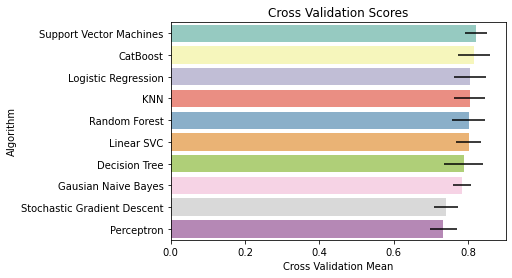

In [115]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

As we can see, support vector machines has the highest cross validation mean and thus we will proceed with this model.

## 6.3.3 Hyperparameter tuning for SVM
Hyperparameter tuning is the process of tuning the parameters of a model. Here I will tune the parameters of support vector classifier using GridSearchCV.

In [116]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.757, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.778, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.718, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.699, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.616, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.614, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.795, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.701, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.761, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.722, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.733, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.780, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [117]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [118]:
# Training accuracy

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [119]:
# Mean cross validation score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

Our mean cross validation score improved slightly.

In [120]:
# Survival predictions by support vector classifier

Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
len(Y_pred)


418

# 7. Preparing data for submission

In [122]:
ss.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [123]:
ss.shape


(418, 2)

We want our submission dataframe to have 418 rows and 2 columns, PassengerId and Survived.

In [124]:
# Create submission dataframe

submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1


In [125]:
submit.shape


(418, 2)

Our dataframe is ready for submission!


In [127]:
# Create and save csv file 

submit.to_csv("C:/Users/user/kaggle/titanic/kaggle_titanic/svm_titanic.csv", index = False)

# 8. Possible extensions to improve model accuracy
Analyse ticket and cabin features
Do these features help predict passenger survival?
If yes, consider including them in the training set instead of dropping
Come up with alternative features in feature engineering
Is there any other features you can potentially create from existing features in the dataset
Remove features that are less important
Does removing features help reduce overfitting in the model?
Ensemble modelling
This is a more advanced technique whereby you combine prediction results from multiple machine learning models
# 9. Conclusion
You should achieve a submission score of 0.77511 if you follow exactly what I have done in this notebook. In other words, I have correctly predicted 77.5% of the test set. I highly encourage you to work through this project again and see if you can improve on this result.

If you found any mistakes in the notebook or places where I can potentially improve on, feel free to reach out to me. Let's help each other get better - happy learning!